In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import math

from matplotlib import pyplot as plt

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer

from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('database.csv')
df

,REST_ID,Количество квартир в радиусе 500 м,Количество квартир в радиусе 1000 м,Количество квартир в 5 минутах пешком,Количество квартир в 10 минутах пешком,Количество квартир в 5 минутах на машине,Количество жителей в радиусе 500 м,Количество жителей в радиусе 1000 м,Количество жителей в 5 минутах пешком,Количество жителей в 10 минутах пешком,...,hrs_weekend,summer,FIFA,sc_sum,is_dt,weekday_morn_sh,weekday_evn_sh,weekend_morn_sh,weekend_evn_sh,SALES
0,1,3629.0,17160.0,1034.0,5134.0,50800.0,7970.0,37620.0,2212.0,11209.0,...,21.0,1,0,17.15,0,0.857143,1.000000,0.857143,1.000000,2.221224e+07
1,1,3629.0,17160.0,1034.0,5134.0,50800.0,7970.0,37620.0,2212.0,11209.0,...,21.0,1,0,17.15,0,0.857143,1.000000,0.857143,1.000000,2.016501e+07
2,1,3629.0,17160.0,1034.0,5134.0,50800.0,7970.0,37620.0,2212.0,11209.0,...,21.0,0,0,17.15,0,0.857143,1.000000,0.857143,1.000000,1.273068e+07
3,1,3629.0,17160.0,1034.0,5134.0,50800.0,7970.0,37620.0,2212.0,11209.0,...,21.0,0,0,17.15,0,0.857143,1.000000,0.857143,1.000000,1.051243e+07
4,1,3629.0,17160.0,1034.0,5134.0,50800.0,7970.0,37620.0,2212.0,11209.0,...,21.0,0,0,17.15,0,0.857143,1.000000,0.857143,1.000000,1.170467e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,526,2410.0,6799.0,568.0,774.0,19818.0,3949.0,8337.0,1454.0,4411.0,...,17.0,0,0,17.60,1,0.857143,0.571429,0.857143,0.571429,4.825290e+06
15908,527,6276.0,14926.0,1820.0,5370.0,19323.0,7876.0,26935.0,3485.0,9799.0,...,19.0,0,0,17.05,1,0.714286,1.000000,0.714286,1.000000,5.148536e+06
15909,527,6276.0,14926.0,1820.0,5370.0,19323.0,7876.0,26935.0,3485.0,9799.0,...,19.0,0,0,17.05,1,0.714286,1.000000,0.714286,1.000000,4.060105e+06
15910,528,8842.0,21529.0,2011.0,6678.0,46908.0,16820.0,39311.0,3963.0,17002.0,...,24.0,0,0,15.65,1,0.857143,1.000000,0.857143,1.000000,3.555960e+06


## Генерация n разбиений со стратификацией для обучения

In [3]:
n = 8
X = df.drop(columns = ['SALES'])
U = df[['REST_ID', 'is_dt']].drop_duplicates().reset_index(drop=True)
kf = StratifiedKFold(n_splits=n, shuffle=True, random_state=1)
kf.get_n_splits(X)
kf.split(U['REST_ID'], U['is_dt'])

<generator object _BaseKFold.split at 0x0000028679985B30>

In [4]:
for train_ix, test_ix in kf.split(U['REST_ID'], U['is_dt']):
    train_rest=U[U.index.isin(train_ix)]
    test_rest=U[U.index.isin(test_ix)]
    print('Train rests: {}, IL/DT: {}'.format(train_rest.shape[0], train_rest.loc[train_rest['is_dt']==1].shape[0]))
    print('TEST rests: {}, IL/DT: {}'.format(test_rest.shape[0], test_rest.loc[test_rest['is_dt']==1].shape[0]))

Train rests: 462, IL/DT: 84
TEST rests: 66, IL/DT: 12
Train rests: 462, IL/DT: 84
TEST rests: 66, IL/DT: 12
Train rests: 462, IL/DT: 84
TEST rests: 66, IL/DT: 12
Train rests: 462, IL/DT: 84
TEST rests: 66, IL/DT: 12
Train rests: 462, IL/DT: 84
TEST rests: 66, IL/DT: 12
Train rests: 462, IL/DT: 84
TEST rests: 66, IL/DT: 12
Train rests: 462, IL/DT: 84
TEST rests: 66, IL/DT: 12
Train rests: 462, IL/DT: 84
TEST rests: 66, IL/DT: 12


## Анализ данных

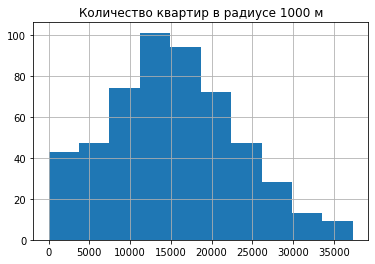

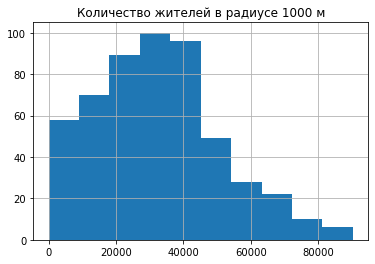

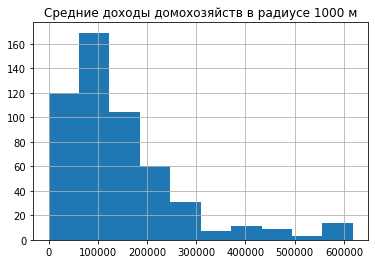

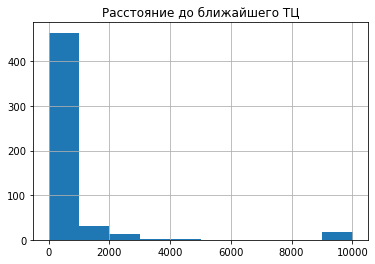

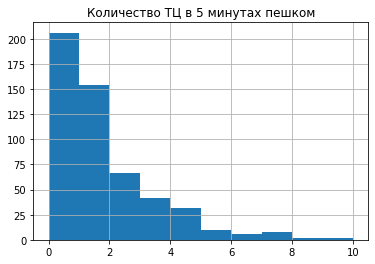

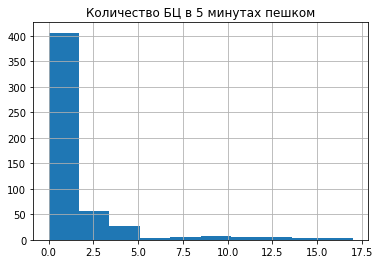

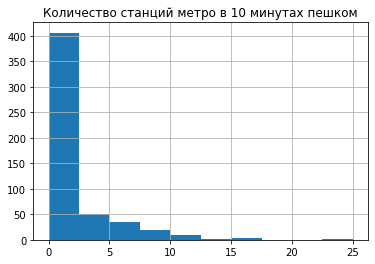

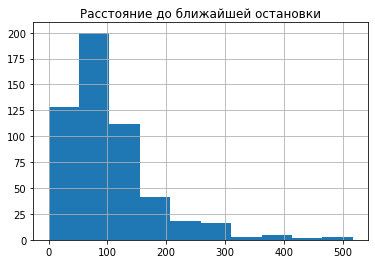

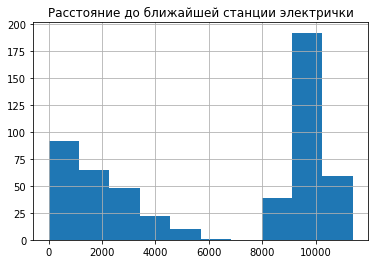

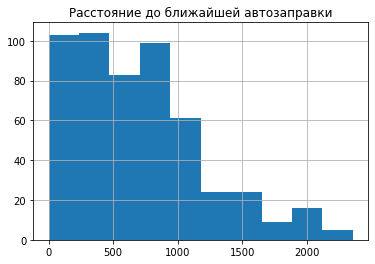

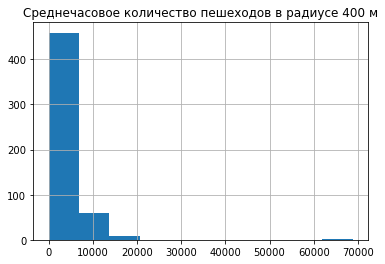

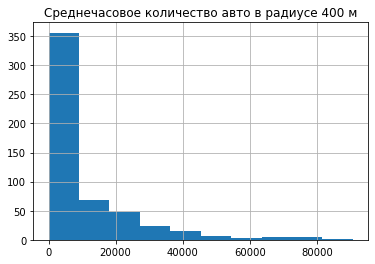

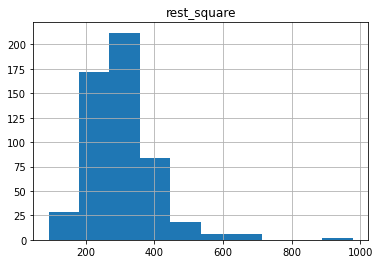

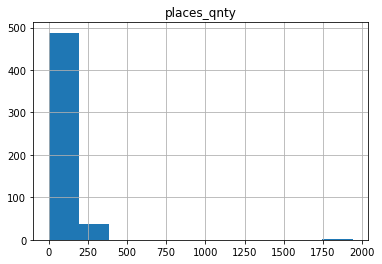

In [5]:
col_plt = [
    'Количество квартир в радиусе 1000 м'
    , 'Количество жителей в радиусе 1000 м'
    , 'Средние доходы домохозяйств в радиусе 1000 м'
    , 'Расстояние до ближайшего ТЦ', 'Количество ТЦ в 5 минутах пешком'
    , 'Количество БЦ в 5 минутах пешком'
    , 'Количество станций метро в 10 минутах пешком'
    , 'Расстояние до ближайшей остановки'
    , 'Расстояние до ближайшей станции электрички'
    , 'Расстояние до ближайшей автозаправки'
    , 'Среднечасовое количество пешеходов в радиусе 400 м'
    , 'Среднечасовое количество авто в радиусе 400 м'
    , 'rest_square', 'places_qnty'
]

for i in col_plt:
    df[['REST_ID', i]].groupby('REST_ID').max().hist()
    plt.show()

In [6]:
# df.corr().sort_values('SALES', ascending = False).to_excel('corr2.xlsx')
df.corr().sort_values('SALES', ascending = False)

,REST_ID,Количество квартир в радиусе 500 м,Количество квартир в радиусе 1000 м,Количество квартир в 5 минутах пешком,Количество квартир в 10 минутах пешком,Количество квартир в 5 минутах на машине,Количество жителей в радиусе 500 м,Количество жителей в радиусе 1000 м,Количество жителей в 5 минутах пешком,Количество жителей в 10 минутах пешком,...,hrs_weekend,summer,FIFA,sc_sum,is_dt,weekday_morn_sh,weekday_evn_sh,weekend_morn_sh,weekend_evn_sh,SALES
SALES,-0.109539,0.037808,0.101542,0.071111,0.055062,0.180562,0.055647,0.116950,0.088605,0.078292,...,0.404291,0.132543,0.036827,0.165959,-0.129989,0.422985,0.486367,0.418432,0.440473,1.000000
Средние доходы домохозяйств в радиусе 1000 м,-0.079137,-0.026487,0.004980,0.006227,0.021557,0.039694,0.003785,0.068533,0.031904,0.049948,...,0.225897,0.001609,0.001614,-0.085491,-0.113285,0.324357,0.277692,0.312993,0.214489,0.488800
Среднесуточное количество авто в радиусе 400 м,-0.090568,-0.089064,0.026163,-0.059025,-0.044934,0.261329,-0.064288,0.091156,-0.036116,-0.012879,...,0.332036,0.004206,0.004059,-0.072686,-0.148554,0.406417,0.405114,0.398329,0.343972,0.487126
weekday_evn_sh,-0.047847,0.052033,0.080687,0.102405,0.073217,0.233690,0.037768,0.109980,0.086485,0.075357,...,0.779005,-0.003204,-0.005090,0.181949,0.190369,0.706242,1.000000,0.702470,0.945376,0.486367
Средние доходы домохозяйств в 10 минутах пешком,-0.086524,0.027985,0.048229,0.044097,0.073945,0.072849,0.056988,0.126071,0.068319,0.099932,...,0.176492,0.002241,0.002283,-0.120239,-0.161277,0.278826,0.244942,0.265807,0.183124,0.465608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Количество гипермаркетов в 100 м,0.200590,-0.212996,-0.269113,-0.189150,-0.239296,-0.203810,-0.216876,-0.256611,-0.195809,-0.222710,...,0.177642,-0.001743,-0.003721,0.112841,0.572167,0.138065,0.126948,0.148541,0.115896,-0.143529
Расстояние до ближайшего ТЦ,0.117931,-0.156048,-0.202678,-0.100970,-0.164214,-0.246490,-0.117247,-0.204804,-0.105896,-0.142496,...,-0.088892,0.008013,0.004498,0.057563,0.259672,-0.103238,-0.076777,-0.099270,-0.089716,-0.165748
Расстояние до ближайшей станции электрички,-0.000416,0.033615,0.097884,-0.005122,0.049819,0.156696,0.022748,0.062333,-0.019816,0.013757,...,-0.077599,0.002337,0.002340,-0.026113,-0.086536,-0.225166,-0.124746,-0.221280,-0.072757,-0.189889
Расстояние до ближайшей остановки,0.156971,-0.207837,-0.256791,-0.270326,-0.302591,-0.259907,-0.222089,-0.256089,-0.298963,-0.288832,...,-0.060209,0.004592,0.000579,0.000682,0.337099,-0.116698,-0.131779,-0.107192,-0.126525,-0.229759


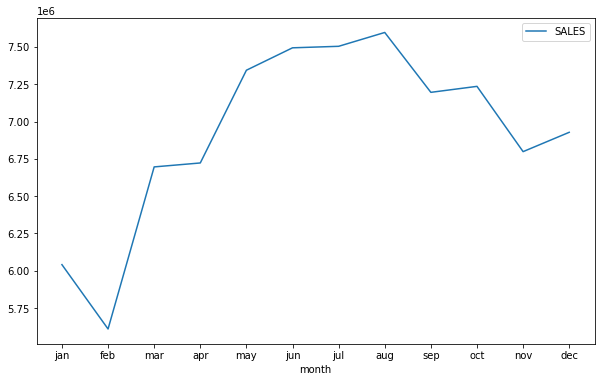

In [7]:
seas = df[['month', 'SALES']].groupby('month').mean()
seas.plot(figsize = (10,6))
plt.xticks(ticks = seas.index, labels = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.show()

In [8]:
df[['REST_ID', 'SALES']].groupby('REST_ID').mean()

,SALES
REST_ID,
1,1.479259e+07
2,9.259622e+06
3,9.402579e+06
4,1.136647e+07
5,1.768078e+07
...,...
524,6.558178e+06
525,3.682455e+06
526,5.113604e+06


## Обучение модели на всех признаках

In [9]:
from catboost import CatBoostRegressor, cv, Pool
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [10]:
X = df.drop(columns = ['SALES'])
y = df[['REST_ID', 'SALES']]
cat_cols = ['frmt_manual_1', 'city', 'maturity_years']

In [11]:
def print_learn_report(start, y_test, y_pred):
    print('\nВремя выполнения - ', datetime.now() - start)
    print("MAE:",np.around(mean_absolute_error(y_test, y_pred)))
    print("MAPE:",np.around(np.mean(np.abs((y_test - y_pred) / y_test)) * 100, 1),'%')
    print("RMSE:",math.sqrt(np.square(np.subtract(y_test,y_pred)).mean()))

### Обучение модели на всех признаках с базовыми значениями гипер-параметров

In [12]:
%%time

learn_data=pd.DataFrame()

X = df.drop(columns = ['SALES'])
y = df[['REST_ID', 'SALES']]

# STKfold prediction
for train_index, test_index in kf.split(U['REST_ID'], U['is_dt']):
    train_rest=U[U.index.isin(train_index)]['REST_ID']
    mask_train=X['REST_ID'].isin(train_rest)
    X_train=X.loc[mask_train]
    X_train=X_train.drop(columns=['REST_ID'])

    mask_train=y['REST_ID'].isin(train_rest)
    y_train=y.loc[mask_train]
    y_train=y_train.drop(columns=['REST_ID'])
    y_train=y_train.values
    
    test_rest=U[U.index.isin(test_index)]['REST_ID']
    mask_test=X['REST_ID'].isin(test_rest)
    X_test=X.loc[mask_test]
    X_test=X_test.drop(columns=['REST_ID'])

    mask_test=y['REST_ID'].isin(test_rest)
    y_test=y.loc[mask_test]
    y_test=y_test.drop(columns=['REST_ID'])
    y_test=y_test.values

    
    start = datetime.now()
    print('Начато выполнение ', start.strftime('%Y-%m-%d %H:%M:%S'))
    
    cbr=CatBoostRegressor(cat_features=cat_cols, random_state=1) #metric_period=10, **params
    
    cbr.fit(X_train, y_train
            ,eval_set=(X_test, y_test)
            #, custom_loss='MAE'
            ,verbose=False
           ,plot = True)
    y_pred_cb = cbr.predict(X_test)

    test_sale=df.loc[mask_test].reset_index(drop=True)
    #test_sale['prediction']=y_pred_cb
    #test_sale['prediction']=np.exp(y_pred_cb)
    test_sale['prediction']=y_pred_cb
    learn_data = pd.concat([learn_data, test_sale])
    print_learn_report(start, learn_data['SALES'], learn_data['prediction'])
    #print(y_pred_cb)
res_ttl_base = learn_data

Начато выполнение  2022-05-13 22:41:21


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:50.940554
MAE: 790104.0
MAPE: 14.9 %
RMSE: 1042716.0605817405
Начато выполнение  2022-05-13 22:42:12


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:49.602062
MAE: 893806.0
MAPE: 16.2 %
RMSE: 1165571.3315466784
Начато выполнение  2022-05-13 22:43:02


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:51.709220
MAE: 950470.0
MAPE: 16.1 %
RMSE: 1265227.358850406
Начато выполнение  2022-05-13 22:43:53


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:52.148048
MAE: 938484.0
MAPE: 15.4 %
RMSE: 1261639.4609608557
Начато выполнение  2022-05-13 22:44:46


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:53.085872
MAE: 930281.0
MAPE: 15.4 %
RMSE: 1268635.5485245457
Начато выполнение  2022-05-13 22:45:39


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:50.501097
MAE: 932156.0
MAPE: 15.2 %
RMSE: 1277945.105478797
Начато выполнение  2022-05-13 22:46:29


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:51.052961
MAE: 949614.0
MAPE: 15.4 %
RMSE: 1307834.7473286078
Начато выполнение  2022-05-13 22:47:20


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:51.152805
MAE: 939282.0
MAPE: 15.2 %
RMSE: 1289534.0140901362
Wall time: 6min 50s


<AxesSubplot:>

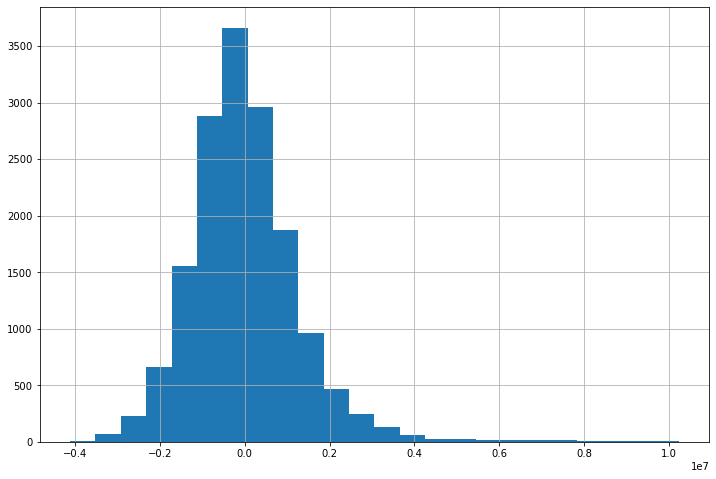

In [13]:
res_ttl_base['err'] = res_ttl_base['SALES'] - res_ttl_base['prediction']
res_ttl_base['err'].hist(bins = 24, figsize = (12,8))

In [14]:
res_ttl_base['err'].describe()

count    1.591200e+04
mean    -3.462406e+03
std      1.289570e+06
min     -4.114401e+06
25%     -7.908902e+05
50%     -1.243761e+05
75%      6.364128e+05
max      1.023033e+07
Name: err, dtype: float64

### Калибровка модели на всех признаках

In [15]:
%%time
params_grid = {
                 'depth': [6, 8, 10],
                 'random_strength': [0.1, 1], 
                 'bagging_temperature': [1e-9, 0.3, 1],
                 'l2_leaf_reg': [0.8, 1.5, 3, 4.5],
                 'rsm' : [0.4, 0.7, 1]
              }

X = df.drop(columns = ['SALES'])
y = df[['REST_ID', 'SALES']]

cbr = CatBoostRegressor(cat_features=cat_cols, iterations=1000,
                        loss_function='RMSE', metric_period=100, random_state=1)
grid_search_result = cbr.grid_search(params_grid, 
                                        X=df.drop(columns=['REST_ID', 'SALES']), 
                                        y=df['SALES'],
                                        cv=kf.split(U['REST_ID'], U['is_dt']),
                                        #train_size=0.8,
                                        shuffle=False,
                                        partition_random_seed=1,
                                        stratified='is_dt',
                                        verbose=False, 
                                        plot=True)
params=grid_search_result['params']

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7584263.3892677	test: 6552914.5848262	best: 6552914.5848262 (0)	total: 26.9ms	remaining: 26.9s
100:	learn: 1453782.2452163	test: 1678756.8133569	best: 1678756.8133569 (100)	total: 3.42s	remaining: 30.4s
200:	learn: 1149153.5168841	test: 1478513.3904512	best: 1478513.3904512 (200)	total: 6.78s	remaining: 27s
300:	learn: 1016518.0359588	test: 1379165.1595001	best: 1379165.1595001 (300)	total: 9.99s	remaining: 23.2s
400:	learn: 935320.6651752	test: 1310329.2227886	best: 1310329.2227886 (400)	total: 13.3s	remaining: 19.8s
500:	learn: 889731.7151048	test: 1272048.7849453	best: 1272048.7849453 (500)	total: 16.6s	remaining: 16.5s
600:	learn: 851529.1953104	test: 1237401.0193409	best: 1237401.0193409 (600)	total: 19.8s	remaining: 13.2s
700:	learn: 822898.9234816	test: 1209833.8475872	best: 1209833.8475872 (700)	total: 23.1s	remaining: 9.85s
800:	learn: 800570.2687176	test: 1186592.5826669	best: 1186592.5826669 (800)	total: 26.4s	remaining: 6.55s
900:	learn: 780711.5931823	test: 11708

900:	learn: 808733.2989326	test: 1187266.1382763	best: 1187266.1382763 (900)	total: 27.1s	remaining: 2.98s
999:	learn: 790742.1946757	test: 1171978.8862894	best: 1171978.8862894 (999)	total: 29.8s	remaining: 0us

bestTest = 1171978.886
bestIteration = 999

0:	learn: 7588403.4838501	test: 6549898.0829623	best: 6549898.0829623 (0)	total: 21ms	remaining: 21s
100:	learn: 1612069.3629225	test: 1780966.8865230	best: 1780966.8865230 (100)	total: 2.85s	remaining: 25.4s
200:	learn: 1247636.6185612	test: 1564146.6056348	best: 1564146.6056348 (200)	total: 5.85s	remaining: 23.3s
300:	learn: 1092549.1132855	test: 1441713.0355670	best: 1441713.0355670 (300)	total: 9.02s	remaining: 20.9s
400:	learn: 997617.5322704	test: 1364126.4080299	best: 1364126.4080299 (400)	total: 12s	remaining: 18s
500:	learn: 933942.2882450	test: 1309712.5089325	best: 1309712.5089325 (500)	total: 15.1s	remaining: 15s
600:	learn: 893399.1821040	test: 1273651.4355523	best: 1273651.4355523 (600)	total: 18s	remaining: 11.9s
700:	

700:	learn: 721836.2936984	test: 1196474.8264243	best: 1196474.8264243 (700)	total: 34.3s	remaining: 14.6s
800:	learn: 703093.5352979	test: 1180889.4836371	best: 1180889.4836371 (800)	total: 39.1s	remaining: 9.71s
900:	learn: 685581.3194074	test: 1167002.2235263	best: 1167002.2235263 (900)	total: 43.9s	remaining: 4.82s
999:	learn: 671075.5432365	test: 1157601.3449624	best: 1157601.3449624 (999)	total: 48.6s	remaining: 0us

bestTest = 1157601.345
bestIteration = 999

0:	learn: 7587061.5654762	test: 6549925.8591363	best: 6549925.8591363 (0)	total: 39.4ms	remaining: 39.3s
100:	learn: 1385627.5579236	test: 1758623.2291134	best: 1758623.2291134 (100)	total: 4.6s	remaining: 41s
200:	learn: 1025801.5945584	test: 1476743.2736097	best: 1476743.2736097 (200)	total: 9.44s	remaining: 37.5s
300:	learn: 908477.9153449	test: 1379334.4744889	best: 1379334.4744889 (300)	total: 14.3s	remaining: 33.3s
400:	learn: 832732.8914249	test: 1309438.0587388	best: 1309438.0587388 (400)	total: 19s	remaining: 28.3s

400:	learn: 715688.0925084	test: 1433380.1453845	best: 1433380.1453845 (400)	total: 42.8s	remaining: 1m 3s
500:	learn: 676384.8482038	test: 1406059.6116042	best: 1406059.6116042 (500)	total: 53.4s	remaining: 53.2s
600:	learn: 647811.3574959	test: 1386398.4037396	best: 1386398.4037396 (600)	total: 1m 3s	remaining: 42.3s
700:	learn: 625023.7145187	test: 1373228.6693040	best: 1373228.6693040 (700)	total: 1m 14s	remaining: 31.7s
800:	learn: 608153.3851954	test: 1364566.1292317	best: 1364566.1292317 (800)	total: 1m 25s	remaining: 21.1s
900:	learn: 590990.1296418	test: 1355943.5383920	best: 1355943.5383920 (900)	total: 1m 35s	remaining: 10.5s
999:	learn: 578117.9467737	test: 1348950.1811159	best: 1348950.1811159 (999)	total: 1m 45s	remaining: 0us

bestTest = 1348950.181
bestIteration = 999

0:	learn: 7584798.5853307	test: 6552439.0897395	best: 6552439.0897395 (0)	total: 106ms	remaining: 1m 45s
100:	learn: 1208388.6384651	test: 1913507.0434698	best: 1913507.0434698 (100)	total: 10.7s	remainin

100:	learn: 1469714.8526798	test: 1701389.2745012	best: 1701389.2745012 (100)	total: 2.66s	remaining: 23.7s
200:	learn: 1184841.0280883	test: 1519925.5996866	best: 1519925.5996866 (200)	total: 5.25s	remaining: 20.9s
300:	learn: 1057797.1900405	test: 1417439.5607378	best: 1417439.5607378 (300)	total: 7.89s	remaining: 18.3s
400:	learn: 972909.6666825	test: 1351548.1573230	best: 1351548.1573230 (400)	total: 10.5s	remaining: 15.7s
500:	learn: 917919.9301406	test: 1305774.0690263	best: 1305774.0690263 (500)	total: 13.1s	remaining: 13.1s
600:	learn: 883376.8440795	test: 1273442.6418357	best: 1273442.6418357 (600)	total: 15.7s	remaining: 10.4s
700:	learn: 854025.5424004	test: 1248119.1139446	best: 1248119.1139446 (700)	total: 18.4s	remaining: 7.84s
800:	learn: 826814.8041893	test: 1226188.5907219	best: 1226188.5907219 (800)	total: 21s	remaining: 5.23s
900:	learn: 806973.2554866	test: 1208530.1881762	best: 1208530.1881762 (900)	total: 23.7s	remaining: 2.6s
999:	learn: 790580.5505152	test: 1197

999:	learn: 658093.0478165	test: 1138190.8768429	best: 1138190.8768429 (999)	total: 48.1s	remaining: 0us

bestTest = 1138190.877
bestIteration = 999

0:	learn: 7585744.2010179	test: 6567848.9340810	best: 6567848.9340810 (0)	total: 48.4ms	remaining: 48.3s
100:	learn: 1243285.7133722	test: 1667926.2350533	best: 1667926.2350533 (100)	total: 5.24s	remaining: 46.6s
200:	learn: 961072.5418558	test: 1410157.2620814	best: 1410157.2620814 (200)	total: 10s	remaining: 39.9s
300:	learn: 858835.0045285	test: 1306512.0586890	best: 1306512.0586890 (300)	total: 14.8s	remaining: 34.3s
400:	learn: 807684.1402521	test: 1253789.7457195	best: 1253789.7457195 (400)	total: 19.5s	remaining: 29.2s
500:	learn: 771410.5627466	test: 1219664.9061999	best: 1219664.9061999 (500)	total: 24.3s	remaining: 24.2s
600:	learn: 742648.1002940	test: 1191970.6522593	best: 1191970.6522593 (600)	total: 29s	remaining: 19.3s
700:	learn: 722120.8325411	test: 1176129.6664823	best: 1176129.6664823 (700)	total: 34.2s	remaining: 14.6s

700:	learn: 608935.5022763	test: 1332869.5830498	best: 1332869.5830498 (700)	total: 1m 13s	remaining: 31.2s
800:	learn: 592699.6278791	test: 1325573.6349237	best: 1325573.6349237 (800)	total: 1m 23s	remaining: 20.8s
900:	learn: 579353.5286640	test: 1320394.8729224	best: 1320394.8729224 (900)	total: 1m 34s	remaining: 10.4s
999:	learn: 566343.9641603	test: 1316694.0887348	best: 1316694.0887348 (999)	total: 1m 44s	remaining: 0us

bestTest = 1316694.089
bestIteration = 999

0:	learn: 7583930.0899711	test: 6592259.3704178	best: 6592259.3704178 (0)	total: 105ms	remaining: 1m 44s
100:	learn: 1075851.2037106	test: 1822751.6564109	best: 1822751.6564109 (100)	total: 11s	remaining: 1m 38s
200:	learn: 810028.7226771	test: 1514684.7114237	best: 1514684.7114237 (200)	total: 21.6s	remaining: 1m 25s
300:	learn: 737838.1909498	test: 1451032.1245090	best: 1451032.1245090 (300)	total: 32.1s	remaining: 1m 14s
400:	learn: 695627.0154581	test: 1416660.6597880	best: 1416660.6597880 (400)	total: 42.7s	remaini

400:	learn: 748539.3328197	test: 1518659.2133754	best: 1518659.2133754 (400)	total: 42.6s	remaining: 1m 3s
500:	learn: 710011.9053725	test: 1486548.1066532	best: 1486548.1066532 (500)	total: 53.2s	remaining: 53s
600:	learn: 682684.5860878	test: 1465461.5550580	best: 1465461.5550580 (600)	total: 1m 3s	remaining: 42.3s
700:	learn: 662565.4640798	test: 1451796.6757303	best: 1451796.6757303 (700)	total: 1m 14s	remaining: 31.9s
800:	learn: 646222.4799189	test: 1437419.2856170	best: 1437419.2856170 (800)	total: 1m 25s	remaining: 21.2s
900:	learn: 632480.2822248	test: 1427934.2436464	best: 1427934.2436464 (900)	total: 1m 35s	remaining: 10.5s
999:	learn: 619719.4365288	test: 1418558.1877602	best: 1418558.1877602 (999)	total: 1m 46s	remaining: 0us

bestTest = 1418558.188
bestIteration = 999

0:	learn: 7584263.3892677	test: 6552914.5848262	best: 6552914.5848262 (0)	total: 21.9ms	remaining: 21.9s
100:	learn: 1453782.2452163	test: 1678756.8133569	best: 1678756.8133569 (100)	total: 2.63s	remaining:

100:	learn: 1599350.7992746	test: 1768197.9110389	best: 1768197.9110389 (100)	total: 2.59s	remaining: 23s
200:	learn: 1247789.2967505	test: 1557519.6897119	best: 1557519.6897119 (200)	total: 5.22s	remaining: 20.7s
300:	learn: 1098164.7687013	test: 1448256.8867248	best: 1448256.8867248 (300)	total: 7.83s	remaining: 18.2s
400:	learn: 995009.1761264	test: 1360807.5805433	best: 1360807.5805433 (400)	total: 10.4s	remaining: 15.5s
500:	learn: 929978.8720543	test: 1300024.3490743	best: 1300024.3490743 (500)	total: 13s	remaining: 12.9s
600:	learn: 888816.6564612	test: 1262656.0005819	best: 1262656.0005819 (600)	total: 15.6s	remaining: 10.4s
700:	learn: 856147.5154851	test: 1231980.8153987	best: 1231980.8153987 (700)	total: 18.2s	remaining: 7.77s
800:	learn: 829142.9996510	test: 1205135.9888348	best: 1205135.9888348 (800)	total: 20.8s	remaining: 5.16s
900:	learn: 808733.2989326	test: 1187266.1382763	best: 1187266.1382763 (900)	total: 23.4s	remaining: 2.57s
999:	learn: 790742.1946757	test: 11719

999:	learn: 658321.2872536	test: 1156122.5297745	best: 1156122.5297745 (999)	total: 47.9s	remaining: 0us

bestTest = 1156122.53
bestIteration = 999

0:	learn: 7585537.3505219	test: 6547554.8407155	best: 6547554.8407155 (0)	total: 38.1ms	remaining: 38.1s
100:	learn: 1369896.4555831	test: 1725213.7428694	best: 1725213.7428694 (100)	total: 4.83s	remaining: 43s
200:	learn: 1021576.3095695	test: 1463021.6123645	best: 1463021.6123645 (200)	total: 9.59s	remaining: 38.1s
300:	learn: 902697.9838502	test: 1370938.2933260	best: 1370938.2933260 (300)	total: 14.2s	remaining: 33s
400:	learn: 829994.6838637	test: 1302265.2556693	best: 1302265.2556693 (400)	total: 18.9s	remaining: 28.2s
500:	learn: 780967.0801183	test: 1252299.2016376	best: 1252299.2016376 (500)	total: 23.6s	remaining: 23.5s
600:	learn: 746060.4062348	test: 1222187.0599100	best: 1222187.0599100 (600)	total: 28.2s	remaining: 18.7s
700:	learn: 721836.2936984	test: 1196474.8264243	best: 1196474.8264243 (700)	total: 33.1s	remaining: 14.1s

700:	learn: 651776.4982716	test: 1415130.8709752	best: 1415130.8709752 (700)	total: 1m 13s	remaining: 31.4s
800:	learn: 637006.8791907	test: 1408494.2668744	best: 1408494.2668744 (800)	total: 1m 24s	remaining: 20.9s
900:	learn: 624233.4865444	test: 1400744.4629326	best: 1400744.4629326 (900)	total: 1m 34s	remaining: 10.4s
999:	learn: 613180.5332040	test: 1395332.6382495	best: 1395332.6382495 (999)	total: 1m 44s	remaining: 0us

bestTest = 1395332.638
bestIteration = 999

0:	learn: 7583610.4470143	test: 6550688.6314581	best: 6550688.6314581 (0)	total: 105ms	remaining: 1m 44s
100:	learn: 1202671.9820696	test: 1875190.6580765	best: 1875190.6580765 (100)	total: 10.6s	remaining: 1m 34s
200:	learn: 868018.6927726	test: 1560198.2693152	best: 1560198.2693152 (200)	total: 21.6s	remaining: 1m 25s
300:	learn: 772731.7522315	test: 1480496.1327801	best: 1480496.1327801 (300)	total: 31.9s	remaining: 1m 14s
400:	learn: 715688.0925084	test: 1433380.1453845	best: 1433380.1453845 (400)	total: 42.8s	remai

400:	learn: 938430.1181121	test: 1355855.2487066	best: 1355855.2487066 (400)	total: 14.5s	remaining: 21.6s
500:	learn: 890158.3853358	test: 1308563.7546885	best: 1308563.7546885 (500)	total: 18s	remaining: 17.9s
600:	learn: 855048.9565633	test: 1272489.9717806	best: 1272489.9717806 (600)	total: 21.5s	remaining: 14.2s
700:	learn: 828294.1525955	test: 1249109.4882352	best: 1249109.4882352 (700)	total: 24.9s	remaining: 10.6s
800:	learn: 805915.1331465	test: 1229963.4132310	best: 1229963.4132310 (800)	total: 28.5s	remaining: 7.09s
900:	learn: 787317.9152119	test: 1212449.7801239	best: 1212449.7801239 (900)	total: 32.3s	remaining: 3.55s
999:	learn: 770503.9284586	test: 1196736.0862156	best: 1196736.0862156 (999)	total: 35.8s	remaining: 0us

bestTest = 1196736.086
bestIteration = 999

0:	learn: 7585598.6715152	test: 6547039.9051026	best: 6547039.9051026 (0)	total: 35.8ms	remaining: 35.7s
100:	learn: 1463667.9858342	test: 1705474.2191431	best: 1705474.2191431 (100)	total: 3.6s	remaining: 32s


100:	learn: 1207645.8971436	test: 1605271.1778706	best: 1605271.1778706 (100)	total: 7.07s	remaining: 1m 2s
200:	learn: 926251.9725224	test: 1363599.3883993	best: 1363599.3883993 (200)	total: 13.6s	remaining: 54.2s
300:	learn: 833175.1223727	test: 1270038.8647253	best: 1270038.8647253 (300)	total: 20.2s	remaining: 46.9s
400:	learn: 783878.9699172	test: 1216972.8584654	best: 1216972.8584654 (400)	total: 26.7s	remaining: 39.9s
500:	learn: 745602.5625284	test: 1175448.1602408	best: 1175448.1602408 (500)	total: 33.8s	remaining: 33.7s
600:	learn: 718466.0763507	test: 1150111.9955273	best: 1150111.9955273 (600)	total: 40.4s	remaining: 26.8s
700:	learn: 698565.4388746	test: 1132400.9771600	best: 1132400.9771600 (700)	total: 47s	remaining: 20s
800:	learn: 680347.8262935	test: 1117476.6871966	best: 1117476.6871966 (800)	total: 53.6s	remaining: 13.3s
900:	learn: 666808.3511197	test: 1107750.8168553	best: 1107750.8168553 (900)	total: 1m	remaining: 6.61s
999:	learn: 654545.5461385	test: 1098232.26

999:	learn: 686824.7808038	test: 1137902.0593222	best: 1137902.0593222 (999)	total: 1m 6s	remaining: 0us

bestTest = 1137902.059
bestIteration = 999

0:	learn: 7578997.8946085	test: 6570169.7342272	best: 6570169.7342272 (0)	total: 161ms	remaining: 2m 41s
100:	learn: 1049192.6607517	test: 1769160.8117033	best: 1769160.8117033 (100)	total: 16.1s	remaining: 2m 23s
200:	learn: 795445.6796614	test: 1466972.4891051	best: 1466972.4891051 (200)	total: 31.9s	remaining: 2m 6s
300:	learn: 720490.8849326	test: 1398467.9600393	best: 1398467.9600393 (300)	total: 47.6s	remaining: 1m 50s
400:	learn: 681367.7032353	test: 1371803.7876413	best: 1371803.7876413 (400)	total: 1m 3s	remaining: 1m 34s
500:	learn: 651114.5471240	test: 1350915.0150402	best: 1350915.0150402 (500)	total: 1m 19s	remaining: 1m 19s
600:	learn: 626603.0356562	test: 1336797.7786464	best: 1336797.7786464 (600)	total: 1m 35s	remaining: 1m 3s
700:	learn: 607674.9836211	test: 1327499.1355162	best: 1327499.1355162 (700)	total: 1m 51s	remai

700:	learn: 640593.2528323	test: 1283621.1507815	best: 1283621.1507815 (700)	total: 1m 54s	remaining: 48.6s
800:	learn: 624054.0407140	test: 1272752.5858458	best: 1272752.5858458 (800)	total: 2m 10s	remaining: 32.3s
900:	learn: 610934.8466269	test: 1265584.6426194	best: 1265584.6426194 (900)	total: 2m 26s	remaining: 16.1s
999:	learn: 599347.1403136	test: 1258664.4715919	best: 1258664.4715919 (999)	total: 2m 42s	remaining: 0us

bestTest = 1258664.472
bestIteration = 999

0:	learn: 7592266.7318671	test: 6581809.1767242	best: 6581809.1767242 (0)	total: 162ms	remaining: 2m 41s
100:	learn: 1255535.6285023	test: 1898032.1500765	best: 1898032.1500765 (100)	total: 16.3s	remaining: 2m 24s
200:	learn: 890507.9779058	test: 1558505.9495098	best: 1558505.9495098 (200)	total: 32.2s	remaining: 2m 8s
300:	learn: 792612.0064146	test: 1463822.2889738	best: 1463822.2889738 (300)	total: 48.4s	remaining: 1m 52s
400:	learn: 737480.7743538	test: 1412109.3175858	best: 1412109.3175858 (400)	total: 1m 4s	remain

400:	learn: 977141.5713989	test: 1385974.7573245	best: 1385974.7573245 (400)	total: 14.1s	remaining: 21.1s
500:	learn: 910268.7597213	test: 1332090.1150986	best: 1332090.1150986 (500)	total: 17.5s	remaining: 17.5s
600:	learn: 867666.1881551	test: 1293328.8926136	best: 1293328.8926136 (600)	total: 20.9s	remaining: 13.9s
700:	learn: 835862.6346297	test: 1265208.5611163	best: 1265208.5611163 (700)	total: 24.3s	remaining: 10.4s
800:	learn: 809473.9502793	test: 1235874.5341160	best: 1235874.5341160 (800)	total: 27.7s	remaining: 6.88s
900:	learn: 786505.9810161	test: 1213342.9178820	best: 1213342.9178820 (900)	total: 31.1s	remaining: 3.41s
999:	learn: 770149.8146515	test: 1197899.5202346	best: 1197899.5202346 (999)	total: 34.4s	remaining: 0us

bestTest = 1197899.52
bestIteration = 999

0:	learn: 7587445.8309124	test: 6545865.4673647	best: 6545865.4673647 (0)	total: 34.6ms	remaining: 34.6s
100:	learn: 1587215.4482874	test: 1774854.1616538	best: 1774854.1616538 (100)	total: 3.49s	remaining: 31

200:	learn: 1009296.2253241	test: 1437082.6686636	best: 1437082.6686636 (200)	total: 14.6s	remaining: 58.2s
300:	learn: 880824.4689749	test: 1320572.3269160	best: 1320572.3269160 (300)	total: 21.2s	remaining: 49.3s
400:	learn: 810555.1262640	test: 1248818.7713324	best: 1248818.7713324 (400)	total: 28.2s	remaining: 42.2s
500:	learn: 765004.8573909	test: 1209132.2239233	best: 1209132.2239233 (500)	total: 35.4s	remaining: 35.3s
600:	learn: 733217.2043121	test: 1181352.0846584	best: 1181352.0846584 (600)	total: 41.9s	remaining: 27.8s
700:	learn: 706028.8944678	test: 1158407.2557697	best: 1158407.2557697 (700)	total: 48.5s	remaining: 20.7s
800:	learn: 683823.2873761	test: 1137138.8470762	best: 1137138.8470762 (800)	total: 55s	remaining: 13.7s
900:	learn: 667030.6823866	test: 1124126.2053934	best: 1124126.2053934 (900)	total: 1m 1s	remaining: 6.76s
999:	learn: 653076.8577620	test: 1111815.0165658	best: 1111815.0165658 (999)	total: 1m 8s	remaining: 0us

bestTest = 1111815.017
bestIteration = 

100:	learn: 1108112.5207958	test: 1790611.8594550	best: 1790611.8594550 (100)	total: 16.5s	remaining: 2m 27s
200:	learn: 816009.4347654	test: 1443436.8079280	best: 1443436.8079280 (200)	total: 32.5s	remaining: 2m 9s
300:	learn: 751383.5540108	test: 1372200.6391032	best: 1372200.6391032 (300)	total: 48.9s	remaining: 1m 53s
400:	learn: 711626.6629404	test: 1333317.5492300	best: 1333317.5492300 (400)	total: 1m 4s	remaining: 1m 36s
500:	learn: 681892.2245612	test: 1309361.9922222	best: 1309361.9922222 (500)	total: 1m 21s	remaining: 1m 21s
600:	learn: 660979.0190446	test: 1293632.3125697	best: 1293632.3125697 (600)	total: 1m 37s	remaining: 1m 4s
700:	learn: 644313.7939622	test: 1280103.8778387	best: 1280103.8778387 (700)	total: 1m 53s	remaining: 48.6s
800:	learn: 628894.5163013	test: 1270806.0545885	best: 1270806.0545885 (800)	total: 2m 9s	remaining: 32.2s
900:	learn: 617774.2349735	test: 1263355.5239399	best: 1263355.5239399 (900)	total: 2m 25s	remaining: 16s
999:	learn: 607977.1265528	tes

900:	learn: 778369.8274268	test: 1150944.9263977	best: 1150944.9263977 (900)	total: 31.1s	remaining: 3.42s
999:	learn: 761842.6661381	test: 1135476.4845356	best: 1135476.4845356 (999)	total: 34.4s	remaining: 0us

bestTest = 1135476.485
bestIteration = 999

0:	learn: 7584329.2740063	test: 6545795.7361234	best: 6545795.7361234 (0)	total: 34.2ms	remaining: 34.2s
100:	learn: 1448632.0862441	test: 1693923.2570311	best: 1693923.2570311 (100)	total: 3.47s	remaining: 30.9s
200:	learn: 1141200.8653393	test: 1513528.8883819	best: 1513528.8883819 (200)	total: 6.87s	remaining: 27.3s
300:	learn: 1014890.9039819	test: 1416902.8068137	best: 1416902.8068137 (300)	total: 10.2s	remaining: 23.8s
400:	learn: 938430.1181121	test: 1355855.2487066	best: 1355855.2487066 (400)	total: 13.6s	remaining: 20.4s
500:	learn: 890158.3853358	test: 1308563.7546885	best: 1308563.7546885 (500)	total: 17s	remaining: 16.9s
600:	learn: 855048.9565633	test: 1272489.9717806	best: 1272489.9717806 (600)	total: 20.6s	remaining: 1

600:	learn: 711047.4733727	test: 1150672.5501765	best: 1150672.5501765 (600)	total: 39.8s	remaining: 26.4s
700:	learn: 689388.0758341	test: 1132141.5943092	best: 1132141.5943092 (700)	total: 46.6s	remaining: 19.9s
800:	learn: 673345.8121849	test: 1118014.8647165	best: 1118014.8647165 (800)	total: 53.2s	remaining: 13.2s
900:	learn: 659266.7664364	test: 1107417.1171445	best: 1107417.1171445 (900)	total: 59.8s	remaining: 6.57s
999:	learn: 646217.6985314	test: 1098688.8185776	best: 1098688.8185776 (999)	total: 1m 6s	remaining: 0us

bestTest = 1098688.819
bestIteration = 999

0:	learn: 7581627.7518826	test: 6548716.6394575	best: 6548716.6394575 (0)	total: 76.5ms	remaining: 1m 16s
100:	learn: 1207645.8971436	test: 1605271.1778706	best: 1605271.1778706 (100)	total: 6.78s	remaining: 1m
200:	learn: 926251.9725224	test: 1363599.3883993	best: 1363599.3883993 (200)	total: 13.7s	remaining: 54.5s
300:	learn: 833175.1223727	test: 1270038.8647253	best: 1270038.8647253 (300)	total: 20.3s	remaining: 47.

400:	learn: 840366.0825317	test: 1280186.7078672	best: 1280186.7078672 (400)	total: 27.2s	remaining: 40.6s
500:	learn: 795860.2293347	test: 1237564.5385580	best: 1237564.5385580 (500)	total: 33.8s	remaining: 33.6s
600:	learn: 762112.5366902	test: 1203397.1285109	best: 1203397.1285109 (600)	total: 41.4s	remaining: 27.5s
700:	learn: 737311.9081955	test: 1179957.8642522	best: 1179957.8642522 (700)	total: 48.2s	remaining: 20.6s
800:	learn: 714838.3051940	test: 1160344.7252381	best: 1160344.7252381 (800)	total: 54.8s	remaining: 13.6s
900:	learn: 700090.9122198	test: 1148265.7327339	best: 1148265.7327339 (900)	total: 1m 1s	remaining: 6.75s
999:	learn: 686824.7808038	test: 1137902.0593222	best: 1137902.0593222 (999)	total: 1m 8s	remaining: 0us

bestTest = 1137902.059
bestIteration = 999

0:	learn: 7578997.8946085	test: 6570169.7342272	best: 6570169.7342272 (0)	total: 175ms	remaining: 2m 54s
100:	learn: 1049192.6607517	test: 1769160.8117033	best: 1769160.8117033 (100)	total: 16.6s	remaining: 2

100:	learn: 1229679.2693340	test: 1828274.2456106	best: 1828274.2456106 (100)	total: 15.8s	remaining: 2m 20s
200:	learn: 873748.5512163	test: 1498795.3825219	best: 1498795.3825219 (200)	total: 31.8s	remaining: 2m 6s
300:	learn: 782182.8547946	test: 1404086.9502796	best: 1404086.9502796 (300)	total: 47.7s	remaining: 1m 50s
400:	learn: 722804.5321970	test: 1352011.8680192	best: 1352011.8680192 (400)	total: 1m 3s	remaining: 1m 35s
500:	learn: 685537.5120881	test: 1316852.7896530	best: 1316852.7896530 (500)	total: 1m 19s	remaining: 1m 19s
600:	learn: 661620.2706435	test: 1298349.7760483	best: 1298349.7760483 (600)	total: 1m 35s	remaining: 1m 3s
700:	learn: 640593.2528323	test: 1283621.1507815	best: 1283621.1507815 (700)	total: 1m 51s	remaining: 47.8s
800:	learn: 624054.0407140	test: 1272752.5858458	best: 1272752.5858458 (800)	total: 2m 8s	remaining: 31.8s
900:	learn: 610934.8466269	test: 1265584.6426194	best: 1265584.6426194 (900)	total: 2m 23s	remaining: 15.8s
999:	learn: 599347.1403136	t

999:	learn: 759609.1661186	test: 1167340.7975190	best: 1167340.7975190 (999)	total: 36.6s	remaining: 0us

bestTest = 1167340.798
bestIteration = 999

0:	learn: 7586702.4153976	test: 6547241.3446376	best: 6547241.3446376 (0)	total: 37ms	remaining: 36.9s
100:	learn: 1575986.7811168	test: 1773373.0722401	best: 1773373.0722401 (100)	total: 3.79s	remaining: 33.8s
200:	learn: 1225035.9482150	test: 1555860.1245350	best: 1555860.1245350 (200)	total: 7.46s	remaining: 29.7s
300:	learn: 1072106.7101575	test: 1448488.6292344	best: 1448488.6292344 (300)	total: 11.1s	remaining: 25.8s
400:	learn: 971083.5525862	test: 1361763.8586107	best: 1361763.8586107 (400)	total: 14.7s	remaining: 22s
500:	learn: 911023.4029899	test: 1312803.1856906	best: 1312803.1856906 (500)	total: 18.3s	remaining: 18.2s
600:	learn: 865178.7335656	test: 1275609.5615427	best: 1275609.5615427 (600)	total: 22.4s	remaining: 14.9s
700:	learn: 829012.3849785	test: 1244597.0816656	best: 1244597.0816656 (700)	total: 26.1s	remaining: 11.

700:	learn: 723337.2534204	test: 1179333.5934785	best: 1179333.5934785 (700)	total: 49.8s	remaining: 21.2s
800:	learn: 704234.4474724	test: 1161355.6340480	best: 1161355.6340480 (800)	total: 56.8s	remaining: 14.1s
900:	learn: 689556.0430471	test: 1149621.3679858	best: 1149621.3679858 (900)	total: 1m 3s	remaining: 7.03s
999:	learn: 676134.0505740	test: 1138262.3043886	best: 1138262.3043886 (999)	total: 1m 11s	remaining: 0us

bestTest = 1138262.304
bestIteration = 999

0:	learn: 7585721.8989290	test: 6558112.5350512	best: 6558112.5350512 (0)	total: 91.1ms	remaining: 1m 31s
100:	learn: 1367346.4951634	test: 1716330.3809912	best: 1716330.3809912 (100)	total: 7.3s	remaining: 1m 5s
200:	learn: 1011712.4407226	test: 1445598.5906972	best: 1445598.5906972 (200)	total: 14.4s	remaining: 57.4s
300:	learn: 884928.5908203	test: 1338380.6267675	best: 1338380.6267675 (300)	total: 21.7s	remaining: 50.4s
400:	learn: 811638.8808436	test: 1260357.0253367	best: 1260357.0253367 (400)	total: 29s	remaining: 4

400:	learn: 696869.9750641	test: 1335427.9476513	best: 1335427.9476513 (400)	total: 1m 26s	remaining: 2m 9s
500:	learn: 669135.4372337	test: 1307609.5097054	best: 1307609.5097054 (500)	total: 1m 48s	remaining: 1m 47s
600:	learn: 647550.3535499	test: 1291463.0383465	best: 1291463.0383465 (600)	total: 2m 9s	remaining: 1m 25s
700:	learn: 630384.7586094	test: 1279218.2441831	best: 1279218.2441831 (700)	total: 2m 30s	remaining: 1m 4s
800:	learn: 616201.5656019	test: 1271656.9548778	best: 1271656.9548778 (800)	total: 2m 52s	remaining: 42.8s
900:	learn: 604485.8034960	test: 1264015.3102115	best: 1264015.3102115 (900)	total: 3m 13s	remaining: 21.2s
999:	learn: 593468.6145151	test: 1256810.4464398	best: 1256810.4464398 (999)	total: 3m 34s	remaining: 0us

bestTest = 1256810.446
bestIteration = 999

0:	learn: 7598147.1627325	test: 6586323.0300111	best: 6586323.0300111 (0)	total: 217ms	remaining: 3m 36s
100:	learn: 1100995.4141502	test: 1813341.3551216	best: 1813341.3551216 (100)	total: 22.1s	rema

100:	learn: 1437166.9083816	test: 1697977.5631761	best: 1697977.5631761 (100)	total: 4.32s	remaining: 38.5s
200:	learn: 1144453.2779601	test: 1502604.4360327	best: 1502604.4360327 (200)	total: 8.42s	remaining: 33.5s
300:	learn: 1019430.7194307	test: 1385038.9670699	best: 1385038.9670699 (300)	total: 12.5s	remaining: 29s
400:	learn: 935054.2502419	test: 1317495.7038448	best: 1317495.7038448 (400)	total: 16.5s	remaining: 24.7s
500:	learn: 885064.5191027	test: 1275699.4691348	best: 1275699.4691348 (500)	total: 20.6s	remaining: 20.5s
600:	learn: 845229.2004023	test: 1241706.9131037	best: 1241706.9131037 (600)	total: 24.8s	remaining: 16.5s
700:	learn: 815471.8421013	test: 1217378.8901593	best: 1217378.8901593 (700)	total: 29.2s	remaining: 12.4s
800:	learn: 793149.0824280	test: 1196820.9436365	best: 1196820.9436365 (800)	total: 33.1s	remaining: 8.23s
900:	learn: 772108.4483045	test: 1177839.3500060	best: 1177839.3500060 (900)	total: 36.9s	remaining: 4.05s
999:	learn: 756831.7740746	test: 116

999:	learn: 784925.1695201	test: 1180079.7878677	best: 1180079.7878677 (999)	total: 37.1s	remaining: 0us

bestTest = 1180079.788
bestIteration = 999

0:	learn: 7581448.0499234	test: 6548750.6996934	best: 6548750.6996934 (0)	total: 88.3ms	remaining: 1m 28s
100:	learn: 1190434.8176695	test: 1573438.6922211	best: 1573438.6922211 (100)	total: 7.48s	remaining: 1m 6s
200:	learn: 912510.6373068	test: 1330066.2660976	best: 1330066.2660976 (200)	total: 14.8s	remaining: 58.9s
300:	learn: 820196.3746638	test: 1233080.3621732	best: 1233080.3621732 (300)	total: 22s	remaining: 51s
400:	learn: 768704.7952302	test: 1187388.5759252	best: 1187388.5759252 (400)	total: 29s	remaining: 43.4s
500:	learn: 731682.9905460	test: 1145156.5796863	best: 1145156.5796863 (500)	total: 36.1s	remaining: 36s
600:	learn: 705637.8239707	test: 1125416.5969018	best: 1125416.5969018 (600)	total: 43.3s	remaining: 28.8s
700:	learn: 685526.6766313	test: 1106489.2820340	best: 1106489.2820340 (700)	total: 50.5s	remaining: 21.5s
80

700:	learn: 720161.2892285	test: 1181496.5273997	best: 1181496.5273997 (700)	total: 50.5s	remaining: 21.5s
800:	learn: 699517.1693903	test: 1164199.7304977	best: 1164199.7304977 (800)	total: 57.4s	remaining: 14.3s
900:	learn: 682470.9330297	test: 1150377.0918754	best: 1150377.0918754 (900)	total: 1m 4s	remaining: 7.08s
999:	learn: 669439.0179018	test: 1139654.0203636	best: 1139654.0203636 (999)	total: 1m 11s	remaining: 0us

bestTest = 1139654.02
bestIteration = 999

0:	learn: 7592272.4750576	test: 6564392.9803080	best: 6564392.9803080 (0)	total: 75ms	remaining: 1m 14s
100:	learn: 1387382.1296443	test: 1759217.7807874	best: 1759217.7807874 (100)	total: 7.47s	remaining: 1m 6s
200:	learn: 1030437.3745632	test: 1490001.5602059	best: 1490001.5602059 (200)	total: 14.7s	remaining: 58.5s
300:	learn: 907340.5749820	test: 1380527.3587847	best: 1380527.3587847 (300)	total: 21.8s	remaining: 50.7s
400:	learn: 832540.8740653	test: 1301782.3028494	best: 1301782.3028494 (400)	total: 28.9s	remaining: 4

400:	learn: 711241.1881218	test: 1449401.3789705	best: 1449401.3789705 (400)	total: 1m 26s	remaining: 2m 8s
500:	learn: 674014.9474453	test: 1417032.2435125	best: 1417032.2435125 (500)	total: 1m 47s	remaining: 1m 47s
600:	learn: 645411.1597340	test: 1394712.7418919	best: 1394712.7418919 (600)	total: 2m 9s	remaining: 1m 25s
700:	learn: 624261.8861395	test: 1379230.2150770	best: 1379230.2150770 (700)	total: 2m 30s	remaining: 1m 4s
800:	learn: 608764.8553159	test: 1368958.0031290	best: 1368958.0031290 (800)	total: 2m 52s	remaining: 42.9s
900:	learn: 593741.0572437	test: 1360105.5619138	best: 1360105.5619138 (900)	total: 3m 14s	remaining: 21.3s
999:	learn: 582334.4650993	test: 1354676.9577894	best: 1354676.9577894 (999)	total: 3m 35s	remaining: 0us

bestTest = 1354676.958
bestIteration = 999

0:	learn: 7592550.4309806	test: 6582136.1254177	best: 6582136.1254177 (0)	total: 229ms	remaining: 3m 48s
100:	learn: 1220735.5591711	test: 1955751.2835344	best: 1955751.2835344 (100)	total: 21.9s	rema

100:	learn: 1573828.1964146	test: 1775449.2714261	best: 1775449.2714261 (100)	total: 4.02s	remaining: 35.8s
200:	learn: 1218268.5165446	test: 1556369.6984628	best: 1556369.6984628 (200)	total: 7.78s	remaining: 30.9s
300:	learn: 1064025.8341939	test: 1445390.9537158	best: 1445390.9537158 (300)	total: 11.4s	remaining: 26.5s
400:	learn: 972321.7764852	test: 1351653.8996640	best: 1351653.8996640 (400)	total: 15s	remaining: 22.4s
500:	learn: 906549.5151013	test: 1293025.5056524	best: 1293025.5056524 (500)	total: 18.6s	remaining: 18.5s
600:	learn: 857981.3691544	test: 1253032.4024835	best: 1253032.4024835 (600)	total: 22.2s	remaining: 14.7s
700:	learn: 826226.7641563	test: 1222910.6549629	best: 1222910.6549629 (700)	total: 25.7s	remaining: 11s
800:	learn: 799052.1516004	test: 1199684.5569841	best: 1199684.5569841 (800)	total: 29.3s	remaining: 7.27s
900:	learn: 778173.2589615	test: 1183991.7910084	best: 1183991.7910084 (900)	total: 32.8s	remaining: 3.61s
999:	learn: 759609.1661186	test: 11673

999:	learn: 666821.8009416	test: 1114927.5943042	best: 1114927.5943042 (999)	total: 1m 10s	remaining: 0us

bestTest = 1114927.594
bestIteration = 999

0:	learn: 7592726.0589729	test: 6560221.7363707	best: 6560221.7363707 (0)	total: 74.6ms	remaining: 1m 14s
100:	learn: 1246096.4740643	test: 1649812.3166777	best: 1649812.3166777 (100)	total: 7.47s	remaining: 1m 6s
200:	learn: 958631.6801072	test: 1404897.3336504	best: 1404897.3336504 (200)	total: 14.7s	remaining: 58.3s
300:	learn: 861492.7790537	test: 1313185.6946403	best: 1313185.6946403 (300)	total: 21.7s	remaining: 50.3s
400:	learn: 810506.7169167	test: 1264345.5260483	best: 1264345.5260483 (400)	total: 28.7s	remaining: 42.8s
500:	learn: 773563.9302737	test: 1230692.4433423	best: 1230692.4433423 (500)	total: 35.6s	remaining: 35.5s
600:	learn: 745307.5537241	test: 1197801.7697709	best: 1197801.7697709 (600)	total: 43s	remaining: 28.5s
700:	learn: 723337.2534204	test: 1179333.5934785	best: 1179333.5934785 (700)	total: 50.1s	remaining: 2

700:	learn: 616719.2693214	test: 1295543.9370680	best: 1295543.9370680 (700)	total: 2m 30s	remaining: 1m 4s
800:	learn: 602777.1813015	test: 1286065.8528704	best: 1286065.8528704 (800)	total: 2m 52s	remaining: 42.8s
900:	learn: 589294.6059391	test: 1279149.3798017	best: 1279149.3798017 (900)	total: 3m 13s	remaining: 21.3s
999:	learn: 577904.3323214	test: 1273207.1328503	best: 1273207.1328503 (999)	total: 3m 35s	remaining: 0us

bestTest = 1273207.133
bestIteration = 999

0:	learn: 7591871.0844153	test: 6589408.3829062	best: 6589408.3829062 (0)	total: 233ms	remaining: 3m 52s
100:	learn: 1070717.5079908	test: 1771123.8122383	best: 1771123.8122383 (100)	total: 22.1s	remaining: 3m 16s
200:	learn: 799727.0249712	test: 1442351.6581319	best: 1442351.6581319 (200)	total: 43.7s	remaining: 2m 53s
300:	learn: 736348.6136213	test: 1372990.5851851	best: 1372990.5851851 (300)	total: 1m 5s	remaining: 2m 31s
400:	learn: 696869.9750641	test: 1335427.9476513	best: 1335427.9476513 (400)	total: 1m 26s	rema

300:	learn: 815951.5680856	test: 979273.6857448	best: 925367.7797757 (200)	total: 1.27s	remaining: 2.95s
400:	learn: 803824.9669935	test: 1023216.2485666	best: 925367.7797757 (200)	total: 1.68s	remaining: 2.51s
500:	learn: 799558.9114204	test: 1049435.1260969	best: 925367.7797757 (200)	total: 2.07s	remaining: 2.06s
600:	learn: 797814.2389385	test: 1065247.2702667	best: 925367.7797757 (200)	total: 2.49s	remaining: 1.65s
700:	learn: 797044.3197486	test: 1075474.5357496	best: 925367.7797757 (200)	total: 2.91s	remaining: 1.24s
800:	learn: 796726.3102689	test: 1081957.6347677	best: 925367.7797757 (200)	total: 3.34s	remaining: 830ms
900:	learn: 796552.9347062	test: 1087027.5972259	best: 925367.7797757 (200)	total: 3.76s	remaining: 414ms
999:	learn: 796466.5432781	test: 1090495.3323068	best: 925367.7797757 (200)	total: 4.16s	remaining: 0us

bestTest = 925367.7798
bestIteration = 200

Training on fold [1/8]
0:	learn: 10517935.6545908	test: 10861718.6546688	best: 10861718.6546688 (0)	total: 4.5

999:	learn: 763504.3655430	test: 1326995.7205385	best: 1121103.6292842 (200)	total: 4.07s	remaining: 0us

bestTest = 1121103.629
bestIteration = 200

Training on fold [7/8]
0:	learn: 10669505.3270332	test: 9816333.4455915	best: 9816333.4455915 (0)	total: 4.58ms	remaining: 4.58s
100:	learn: 1152064.4421570	test: 1426593.8833214	best: 1426593.8833214 (100)	total: 384ms	remaining: 3.42s
200:	learn: 839293.4763021	test: 1147412.2984496	best: 1147412.2984496 (200)	total: 776ms	remaining: 3.08s
300:	learn: 796899.1936982	test: 1151278.5985570	best: 1147412.2984496 (200)	total: 1.18s	remaining: 2.73s
400:	learn: 782772.2196175	test: 1185626.9361098	best: 1147412.2984496 (200)	total: 1.55s	remaining: 2.32s
500:	learn: 776876.3198163	test: 1228493.9897217	best: 1147412.2984496 (200)	total: 1.95s	remaining: 1.94s
600:	learn: 774654.4133372	test: 1252642.9172076	best: 1147412.2984496 (200)	total: 2.37s	remaining: 1.57s
700:	learn: 773736.1529978	test: 1263367.7728516	best: 1147412.2984496 (200)	t

In [16]:
%%time

params.pop('iterations', None)
params_grid = {'learning_rate': [0.05, 0.055, 0.6, 0.65, 0.7, 0.75]}

X = df.drop(columns = ['SALES'])
y = df[['REST_ID', 'SALES']]

# Grid_search params
cbr = CatBoostRegressor(cat_features=cat_cols, iterations=1500, **params,
                        loss_function='RMSE', metric_period=100, random_state=1)
grid_search_result = cbr.grid_search(params_grid, 
                                        X=df.drop(columns=['REST_ID', 'SALES']), 
                                        y=df['SALES'],
                                        cv=kf.split(U['REST_ID'], U['is_dt']),
                                        #train_size=0.8,
                                        shuffle=False,
                                        partition_random_seed=1,
                                        stratified='is_dt',
                                        verbose=False, 
                                        plot=True)
l_rate=grid_search_result['params']
print(l_rate)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7435431.4360368	test: 6427062.5403730	best: 6427062.5403730 (0)	total: 96ms	remaining: 2m 23s
100:	learn: 1000622.6603151	test: 1423549.4777737	best: 1423549.4777737 (100)	total: 7.41s	remaining: 1m 42s
200:	learn: 813590.1099824	test: 1260061.5554608	best: 1260061.5554608 (200)	total: 14.6s	remaining: 1m 34s
300:	learn: 741063.9431820	test: 1191257.1797263	best: 1191257.1797263 (300)	total: 22s	remaining: 1m 27s
400:	learn: 696593.6181722	test: 1155309.2384930	best: 1155309.2384930 (400)	total: 29s	remaining: 1m 19s
500:	learn: 669415.6533783	test: 1131339.3690587	best: 1131339.3690587 (500)	total: 36.1s	remaining: 1m 11s
600:	learn: 645940.6908962	test: 1113282.8677262	best: 1113282.8677262 (600)	total: 43.1s	remaining: 1m 4s
700:	learn: 628073.7409049	test: 1101140.3140690	best: 1101140.3140690 (700)	total: 50.5s	remaining: 57.6s
800:	learn: 611211.4245369	test: 1091671.6935938	best: 1091671.6935938 (800)	total: 57.8s	remaining: 50.4s
900:	learn: 597074.8166341	test: 10866

1100:	learn: 303405.3094459	test: 1780706.5467314	best: 1775150.5425497 (200)	total: 1m 20s	remaining: 29.1s
1200:	learn: 290888.2915139	test: 1783757.4534622	best: 1775150.5425497 (200)	total: 1m 27s	remaining: 21.8s
1300:	learn: 283077.3702718	test: 1781898.1185884	best: 1775150.5425497 (200)	total: 1m 34s	remaining: 14.5s
1400:	learn: 274169.6635372	test: 1784332.8465985	best: 1775150.5425497 (200)	total: 1m 42s	remaining: 7.21s
1499:	learn: 266662.4757337	test: 1785367.3124459	best: 1775150.5425497 (200)	total: 1m 49s	remaining: 0us

bestTest = 1775150.543
bestIteration = 200

0:	learn: 2626451.7732699	test: 2755047.7870998	best: 2755047.7870998 (0)	total: 75.2ms	remaining: 1m 52s
100:	learn: 571230.4935070	test: 1969837.9233724	best: 1969837.9233724 (100)	total: 7.27s	remaining: 1m 40s
200:	learn: 500349.9244159	test: 1975231.2919494	best: 1969837.9233724 (100)	total: 14.4s	remaining: 1m 32s
300:	learn: 452749.5620806	test: 1976987.9224674	best: 1969837.9233724 (100)	total: 21.6s	

500:	learn: 767547.1492466	test: 1374969.0765628	best: 1069759.5802347 (100)	total: 2.1s	remaining: 4.19s
600:	learn: 767344.1859858	test: 1386589.0679500	best: 1069759.5802347 (100)	total: 2.48s	remaining: 3.71s
700:	learn: 767277.9248150	test: 1391522.4954626	best: 1069759.5802347 (100)	total: 2.91s	remaining: 3.31s
800:	learn: 767247.9561413	test: 1395164.9230871	best: 1069759.5802347 (100)	total: 3.32s	remaining: 2.9s
900:	learn: 767230.9575418	test: 1397472.9066213	best: 1069759.5802347 (100)	total: 3.73s	remaining: 2.48s
1000:	learn: 767221.7399092	test: 1398950.2593324	best: 1069759.5802347 (100)	total: 4.13s	remaining: 2.06s
1100:	learn: 767216.9379293	test: 1399906.9076113	best: 1069759.5802347 (100)	total: 4.55s	remaining: 1.65s
1200:	learn: 767214.0527055	test: 1400529.0935722	best: 1069759.5802347 (100)	total: 4.96s	remaining: 1.23s
1300:	learn: 767212.2451521	test: 1400977.8483937	best: 1069759.5802347 (100)	total: 5.34s	remaining: 818ms
1400:	learn: 767210.7678573	test: 1

{'learning_rate': 0.055}
Wall time: 13min 35s


In [17]:
l_rate
params['learning_rate'] = 0.055 #0.04

### Обучение модели со всеми признаками на откалиброванных гиперпараметрах

In [18]:
params['iterations'] = 2000
params = {'rsm': 1, #best params
 'depth': 8,
 'bagging_temperature': 1e-09,
 'random_strength': 0.1,
 'l2_leaf_reg': 0.8,
 'learning_rate': 0.06,
 'iterations': 2000}
params

{'rsm': 1,
 'depth': 8,
 'bagging_temperature': 1e-09,
 'random_strength': 0.1,
 'l2_leaf_reg': 0.8,
 'learning_rate': 0.06,
 'iterations': 2000}

In [19]:
%%time

params['iterations'] = 2000

learn_data=pd.DataFrame()
X = df.drop(columns = ['SALES'])
y = df[['REST_ID', 'SALES']]

# STKfold prediction
for train_index, test_index in kf.split(U['REST_ID'], U['is_dt']):
    train_rest=U[U.index.isin(train_index)]['REST_ID']
    mask_train=X['REST_ID'].isin(train_rest)
    X_train=X.loc[mask_train]
    X_train=X_train.drop(columns=['REST_ID'])

    mask_train=y['REST_ID'].isin(train_rest)
    y_train=y.loc[mask_train]
    y_train=y_train.drop(columns=['REST_ID'])
    y_train=y_train.values
    
    test_rest=U[U.index.isin(test_index)]['REST_ID']
    mask_test=X['REST_ID'].isin(test_rest)
    X_test=X.loc[mask_test]
    X_test=X_test.drop(columns=['REST_ID'])

    mask_test=y['REST_ID'].isin(test_rest)
    y_test=y.loc[mask_test]
    y_test=y_test.drop(columns=['REST_ID'])
    y_test=y_test.values

    
    start = datetime.now()
    print('Начато выполнение ', start.strftime('%Y-%m-%d %H:%M:%S'))
    
    cbr=CatBoostRegressor(cat_features=cat_cols, random_state=1, metric_period=10, **params)
    
    cbr.fit(X_train, y_train
            ,eval_set=(X_test, y_test)
            #, custom_loss='MAE'
            ,verbose=False
           ,plot = True)
    y_pred_cb = cbr.predict(X_test)

    test_sale=df.loc[mask_test].reset_index(drop=True)
    #test_sale['prediction']=y_pred_cb
    #test_sale['prediction']=np.exp(y_pred_cb)
    test_sale['prediction']=y_pred_cb
    learn_data = pd.concat([learn_data, test_sale])
    print_learn_report(start, learn_data['SALES'], learn_data['prediction'])
    #print(y_pred_cb)

Начато выполнение  2022-05-14 04:12:04


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:31.223637
MAE: 757974.0
MAPE: 14.6 %
RMSE: 1018546.10614283
Начато выполнение  2022-05-14 04:14:36


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:29.029720
MAE: 854057.0
MAPE: 15.6 %
RMSE: 1149636.5048332682
Начато выполнение  2022-05-14 04:17:05


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.398459
MAE: 878923.0
MAPE: 15.1 %
RMSE: 1210506.571812153
Начато выполнение  2022-05-14 04:19:32


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.040299
MAE: 864394.0
MAPE: 14.3 %
RMSE: 1195691.0905136904
Начато выполнение  2022-05-14 04:21:59


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.461075
MAE: 858833.0
MAPE: 14.4 %
RMSE: 1199546.4372100409
Начато выполнение  2022-05-14 04:24:27


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.183265
MAE: 858808.0
MAPE: 14.1 %
RMSE: 1205211.6337155951
Начато выполнение  2022-05-14 04:26:54


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.327136
MAE: 869601.0
MAPE: 14.3 %
RMSE: 1226929.3853624463
Начато выполнение  2022-05-14 04:29:21


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.486234
MAE: 864646.0
MAPE: 14.1 %
RMSE: 1217628.1940360414
Wall time: 19min 44s


<AxesSubplot:>

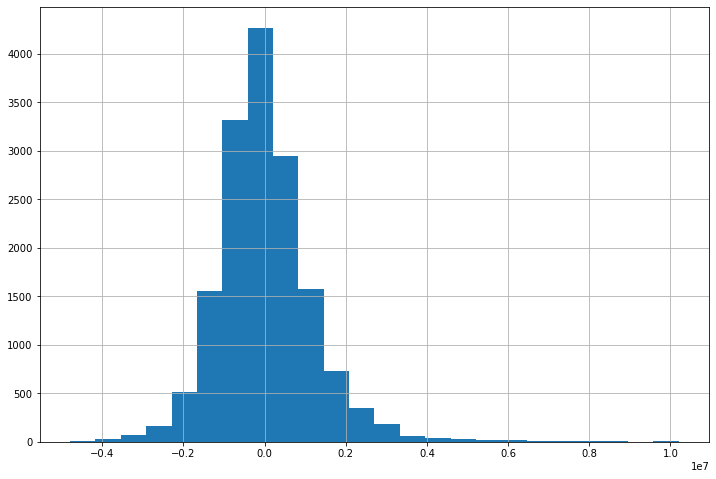

In [20]:
res_ttl_tuned = learn_data
res_ttl_tuned['err'] = res_ttl_tuned['SALES'] - res_ttl_tuned['prediction']
res_ttl_tuned['err'].hist(bins = 24, figsize = (12,8))

In [21]:
res_ttl_tuned['err'].describe()

count    1.591200e+04
mean     1.862881e+04
std      1.217524e+06
min     -4.791961e+06
25%     -6.909013e+05
50%     -8.832784e+04
75%      5.934614e+05
max      1.020628e+07
Name: err, dtype: float64

## Обучение модели на выбранных признаках с базовыми знасениями гипер-параметров

In [22]:
%%time

learn_data=pd.DataFrame()

X = df.drop(columns = ['SALES', 'weekday_morn_sh', 'weekday_evn_sh', 'weekend_morn_sh',
       'weekend_evn_sh', 'hrs_weekday', 'hrs_weekend'])
y = df[['REST_ID', 'SALES']]

# STKfold prediction
for train_index, test_index in kf.split(U['REST_ID'], U['is_dt']):
    train_rest=U[U.index.isin(train_index)]['REST_ID']
    mask_train=X['REST_ID'].isin(train_rest)
    X_train=X.loc[mask_train]
    X_train=X_train.drop(columns=['REST_ID'])

    mask_train=y['REST_ID'].isin(train_rest)
    y_train=y.loc[mask_train]
    y_train=y_train.drop(columns=['REST_ID'])
    y_train=y_train.values
    
    test_rest=U[U.index.isin(test_index)]['REST_ID']
    mask_test=X['REST_ID'].isin(test_rest)
    X_test=X.loc[mask_test]
    X_test=X_test.drop(columns=['REST_ID'])

    mask_test=y['REST_ID'].isin(test_rest)
    y_test=y.loc[mask_test]
    y_test=y_test.drop(columns=['REST_ID'])
    y_test=y_test.values

    
    start = datetime.now()
    print('Начато выполнение ', start.strftime('%Y-%m-%d %H:%M:%S'))
    
    cbr=CatBoostRegressor(cat_features=cat_cols, random_state=1) #metric_period=10, **params
    
    cbr.fit(X_train, y_train
            ,eval_set=(X_test, y_test)
            #, custom_loss='MAE'
            ,verbose=False
           ,plot = True)
    y_pred_cb = cbr.predict(X_test)

    test_sale=df.loc[mask_test].reset_index(drop=True)
    #test_sale['prediction']=y_pred_cb
    #test_sale['prediction']=np.exp(y_pred_cb)
    test_sale['prediction']=y_pred_cb
    learn_data = pd.concat([learn_data, test_sale])
    print_learn_report(start, learn_data['SALES'], learn_data['prediction'])
    #print(y_pred_cb)

Начато выполнение  2022-05-14 04:31:50


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:39.516004
MAE: 914585.0
MAPE: 17.6 %
RMSE: 1187087.3017124953
Начато выполнение  2022-05-14 04:32:29


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:39.822396
MAE: 1038190.0
MAPE: 19.0 %
RMSE: 1369550.6934057132
Начато выполнение  2022-05-14 04:33:09


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:39.768233
MAE: 1093211.0
MAPE: 18.6 %
RMSE: 1468213.7319701004
Начато выполнение  2022-05-14 04:33:49


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:40.315440
MAE: 1060724.0
MAPE: 17.5 %
RMSE: 1438684.5902457272
Начато выполнение  2022-05-14 04:34:29


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:40.136879
MAE: 1049381.0
MAPE: 17.7 %
RMSE: 1428458.7455089074
Начато выполнение  2022-05-14 04:35:09


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:39.149235
MAE: 1058714.0
MAPE: 17.5 %
RMSE: 1456745.347094432
Начато выполнение  2022-05-14 04:35:49


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:40.609182
MAE: 1059628.0
MAPE: 17.3 %
RMSE: 1468320.0672053494
Начато выполнение  2022-05-14 04:36:29


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:00:39.536649
MAE: 1040833.0
MAPE: 17.0 %
RMSE: 1439975.304429562
Wall time: 5min 19s


<AxesSubplot:>

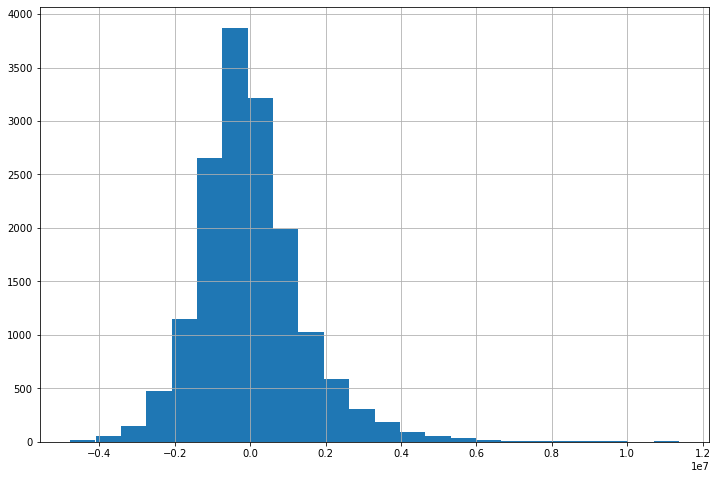

In [23]:
res_smp_base = learn_data
res_smp_base['err'] = res_smp_base['SALES'] - res_smp_base['prediction']
res_smp_base['err'].hist(bins = 24, figsize = (12,8))

In [24]:
res_smp_base['err'].describe()

count    1.591200e+04
mean     2.682253e+04
std      1.439771e+06
min     -4.773092e+06
25%     -8.329459e+05
50%     -1.354936e+05
75%      7.038002e+05
max      1.137100e+07
Name: err, dtype: float64

## Калибровка значений гипер-параметров модели на выбранных признаках

In [25]:
%%time
params_grid = {
                 'depth': [6, 8, 10],
                 'random_strength': [0.1, 1], #Real(1e-9, 10, 'log-uniform'),
                 'bagging_temperature': [1e-9, 0.3, 1],
                 'l2_leaf_reg': [0.8, 1.5, 3, 4.5],
                 'rsm' : [0.4, 0.7, 1]
              }

X = df.drop(columns = ['SALES', 'weekday_morn_sh', 'weekday_evn_sh', 'weekend_morn_sh',
       'weekend_evn_sh', 'hrs_weekday', 'hrs_weekend'])
y = df[['REST_ID', 'SALES']]

# Grid_search params
cbr = CatBoostRegressor(cat_features=cat_cols, iterations=1000,
                        loss_function='RMSE', metric_period=100, random_state=1)
grid_search_result = cbr.grid_search(params_grid, 
                                        X=df.drop(columns=['REST_ID', 'SALES']), 
                                        y=df['SALES'],
                                        cv=kf.split(U['REST_ID'], U['is_dt']),
                                        #train_size=0.8,
                                        shuffle=False,
                                        partition_random_seed=1,
                                        stratified='is_dt',
                                        verbose=False, 
                                        plot=True)
params=grid_search_result['params']

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7584263.3892677	test: 6552914.5848262	best: 6552914.5848262 (0)	total: 26ms	remaining: 25.9s
100:	learn: 1453782.2452163	test: 1678756.8133569	best: 1678756.8133569 (100)	total: 2.83s	remaining: 25.1s
200:	learn: 1149153.5168841	test: 1478513.3904512	best: 1478513.3904512 (200)	total: 5.58s	remaining: 22.2s
300:	learn: 1016518.0359588	test: 1379165.1595001	best: 1379165.1595001 (300)	total: 8.26s	remaining: 19.2s
400:	learn: 935320.6651752	test: 1310329.2227886	best: 1310329.2227886 (400)	total: 10.9s	remaining: 16.2s
500:	learn: 889731.7151048	test: 1272048.7849453	best: 1272048.7849453 (500)	total: 13.4s	remaining: 13.4s
600:	learn: 851529.1953104	test: 1237401.0193409	best: 1237401.0193409 (600)	total: 15.9s	remaining: 10.6s
700:	learn: 822898.9234816	test: 1209833.8475872	best: 1209833.8475872 (700)	total: 18.5s	remaining: 7.88s
800:	learn: 800570.2687176	test: 1186592.5826669	best: 1186592.5826669 (800)	total: 21s	remaining: 5.22s
900:	learn: 780711.5931823	test: 1170877

900:	learn: 808733.2989326	test: 1187266.1382763	best: 1187266.1382763 (900)	total: 23.7s	remaining: 2.6s
999:	learn: 790742.1946757	test: 1171978.8862894	best: 1171978.8862894 (999)	total: 26.3s	remaining: 0us

bestTest = 1171978.886
bestIteration = 999

0:	learn: 7588403.4838501	test: 6549898.0829623	best: 6549898.0829623 (0)	total: 21.5ms	remaining: 21.4s
100:	learn: 1612069.3629225	test: 1780966.8865230	best: 1780966.8865230 (100)	total: 2.63s	remaining: 23.4s
200:	learn: 1247636.6185612	test: 1564146.6056348	best: 1564146.6056348 (200)	total: 5.18s	remaining: 20.6s
300:	learn: 1092549.1132855	test: 1441713.0355670	best: 1441713.0355670 (300)	total: 7.79s	remaining: 18.1s
400:	learn: 997617.5322704	test: 1364126.4080299	best: 1364126.4080299 (400)	total: 10.4s	remaining: 15.5s
500:	learn: 933942.2882450	test: 1309712.5089325	best: 1309712.5089325 (500)	total: 12.9s	remaining: 12.9s
600:	learn: 893399.1821040	test: 1273651.4355523	best: 1273651.4355523 (600)	total: 15.5s	remaining: 

600:	learn: 746060.4062348	test: 1222187.0599100	best: 1222187.0599100 (600)	total: 28.3s	remaining: 18.8s
700:	learn: 721836.2936984	test: 1196474.8264243	best: 1196474.8264243 (700)	total: 33s	remaining: 14.1s
800:	learn: 703093.5352979	test: 1180889.4836371	best: 1180889.4836371 (800)	total: 37.7s	remaining: 9.37s
900:	learn: 685581.3194074	test: 1167002.2235263	best: 1167002.2235263 (900)	total: 42.4s	remaining: 4.66s
999:	learn: 671075.5432365	test: 1157601.3449624	best: 1157601.3449624 (999)	total: 47.1s	remaining: 0us

bestTest = 1157601.345
bestIteration = 999

0:	learn: 7587061.5654762	test: 6549925.8591363	best: 6549925.8591363 (0)	total: 43.7ms	remaining: 43.7s
100:	learn: 1385627.5579236	test: 1758623.2291134	best: 1758623.2291134 (100)	total: 4.58s	remaining: 40.7s
200:	learn: 1025801.5945584	test: 1476743.2736097	best: 1476743.2736097 (200)	total: 9.24s	remaining: 36.7s
300:	learn: 908477.9153449	test: 1379334.4744889	best: 1379334.4744889 (300)	total: 14.3s	remaining: 33

300:	learn: 772731.7522315	test: 1480496.1327801	best: 1480496.1327801 (300)	total: 31.2s	remaining: 1m 12s
400:	learn: 715688.0925084	test: 1433380.1453845	best: 1433380.1453845 (400)	total: 41.7s	remaining: 1m 2s
500:	learn: 676384.8482038	test: 1406059.6116042	best: 1406059.6116042 (500)	total: 51.9s	remaining: 51.7s
600:	learn: 647811.3574959	test: 1386398.4037396	best: 1386398.4037396 (600)	total: 1m 2s	remaining: 41.6s
700:	learn: 625023.7145187	test: 1373228.6693040	best: 1373228.6693040 (700)	total: 1m 12s	remaining: 31.1s
800:	learn: 608153.3851954	test: 1364566.1292317	best: 1364566.1292317 (800)	total: 1m 23s	remaining: 20.6s
900:	learn: 590990.1296418	test: 1355943.5383920	best: 1355943.5383920 (900)	total: 1m 33s	remaining: 10.3s
999:	learn: 578117.9467737	test: 1348950.1811159	best: 1348950.1811159 (999)	total: 1m 43s	remaining: 0us

bestTest = 1348950.181
bestIteration = 999

0:	learn: 7584798.5853307	test: 6552439.0897395	best: 6552439.0897395 (0)	total: 104ms	remaining

100:	learn: 1469714.8526798	test: 1701389.2745012	best: 1701389.2745012 (100)	total: 2.54s	remaining: 22.6s
200:	learn: 1184841.0280883	test: 1519925.5996866	best: 1519925.5996866 (200)	total: 5.08s	remaining: 20.2s
300:	learn: 1057797.1900405	test: 1417439.5607378	best: 1417439.5607378 (300)	total: 7.68s	remaining: 17.8s
400:	learn: 972909.6666825	test: 1351548.1573230	best: 1351548.1573230 (400)	total: 10.2s	remaining: 15.2s
500:	learn: 917919.9301406	test: 1305774.0690263	best: 1305774.0690263 (500)	total: 12.7s	remaining: 12.7s
600:	learn: 883376.8440795	test: 1273442.6418357	best: 1273442.6418357 (600)	total: 15.3s	remaining: 10.2s
700:	learn: 854025.5424004	test: 1248119.1139446	best: 1248119.1139446 (700)	total: 18.1s	remaining: 7.73s
800:	learn: 826814.8041893	test: 1226188.5907219	best: 1226188.5907219 (800)	total: 20.7s	remaining: 5.14s
900:	learn: 806973.2554866	test: 1208530.1881762	best: 1208530.1881762 (900)	total: 23.5s	remaining: 2.58s
999:	learn: 790580.5505152	test: 1

999:	learn: 658093.0478165	test: 1138190.8768429	best: 1138190.8768429 (999)	total: 47.2s	remaining: 0us

bestTest = 1138190.877
bestIteration = 999

0:	learn: 7585744.2010179	test: 6567848.9340810	best: 6567848.9340810 (0)	total: 37.1ms	remaining: 37.1s
100:	learn: 1243285.7133722	test: 1667926.2350533	best: 1667926.2350533 (100)	total: 4.72s	remaining: 42s
200:	learn: 961072.5418558	test: 1410157.2620814	best: 1410157.2620814 (200)	total: 9.37s	remaining: 37.2s
300:	learn: 858835.0045285	test: 1306512.0586890	best: 1306512.0586890 (300)	total: 14s	remaining: 32.5s
400:	learn: 807684.1402521	test: 1253789.7457195	best: 1253789.7457195 (400)	total: 18.6s	remaining: 27.9s
500:	learn: 771410.5627466	test: 1219664.9061999	best: 1219664.9061999 (500)	total: 23.3s	remaining: 23.2s
600:	learn: 742648.1002940	test: 1191970.6522593	best: 1191970.6522593 (600)	total: 28s	remaining: 18.6s
700:	learn: 722120.8325411	test: 1176129.6664823	best: 1176129.6664823 (700)	total: 33s	remaining: 14.1s
800

800:	learn: 592699.6278791	test: 1325573.6349237	best: 1325573.6349237 (800)	total: 1m 22s	remaining: 20.4s
900:	learn: 579353.5286640	test: 1320394.8729224	best: 1320394.8729224 (900)	total: 1m 32s	remaining: 10.2s
999:	learn: 566343.9641603	test: 1316694.0887348	best: 1316694.0887348 (999)	total: 1m 42s	remaining: 0us

bestTest = 1316694.089
bestIteration = 999

0:	learn: 7583930.0899711	test: 6592259.3704178	best: 6592259.3704178 (0)	total: 109ms	remaining: 1m 48s
100:	learn: 1075851.2037106	test: 1822751.6564109	best: 1822751.6564109 (100)	total: 10.7s	remaining: 1m 34s
200:	learn: 810028.7226771	test: 1514684.7114237	best: 1514684.7114237 (200)	total: 20.8s	remaining: 1m 22s
300:	learn: 737838.1909498	test: 1451032.1245090	best: 1451032.1245090 (300)	total: 31s	remaining: 1m 12s
400:	learn: 695627.0154581	test: 1416660.6597880	best: 1416660.6597880 (400)	total: 41.1s	remaining: 1m 1s
500:	learn: 663490.4920161	test: 1393487.6889028	best: 1393487.6889028 (500)	total: 51.5s	remainin

500:	learn: 710011.9053725	test: 1486548.1066532	best: 1486548.1066532 (500)	total: 51.8s	remaining: 51.6s
600:	learn: 682684.5860878	test: 1465461.5550580	best: 1465461.5550580 (600)	total: 1m 2s	remaining: 41.2s
700:	learn: 662565.4640798	test: 1451796.6757303	best: 1451796.6757303 (700)	total: 1m 12s	remaining: 30.8s
800:	learn: 646222.4799189	test: 1437419.2856170	best: 1437419.2856170 (800)	total: 1m 22s	remaining: 20.5s
900:	learn: 632480.2822248	test: 1427934.2436464	best: 1427934.2436464 (900)	total: 1m 33s	remaining: 10.2s
999:	learn: 619719.4365288	test: 1418558.1877602	best: 1418558.1877602 (999)	total: 1m 43s	remaining: 0us

bestTest = 1418558.188
bestIteration = 999

0:	learn: 7584263.3892677	test: 6552914.5848262	best: 6552914.5848262 (0)	total: 25.3ms	remaining: 25.3s
100:	learn: 1453782.2452163	test: 1678756.8133569	best: 1678756.8133569 (100)	total: 2.7s	remaining: 24s
200:	learn: 1149153.5168841	test: 1478513.3904512	best: 1478513.3904512 (200)	total: 5.3s	remaining: 

200:	learn: 1247789.2967505	test: 1557519.6897119	best: 1557519.6897119 (200)	total: 5.03s	remaining: 20s
300:	learn: 1098164.7687013	test: 1448256.8867248	best: 1448256.8867248 (300)	total: 7.53s	remaining: 17.5s
400:	learn: 995009.1761264	test: 1360807.5805433	best: 1360807.5805433 (400)	total: 10s	remaining: 15s
500:	learn: 929978.8720543	test: 1300024.3490743	best: 1300024.3490743 (500)	total: 12.5s	remaining: 12.4s
600:	learn: 888816.6564612	test: 1262656.0005819	best: 1262656.0005819 (600)	total: 15.1s	remaining: 10s
700:	learn: 856147.5154851	test: 1231980.8153987	best: 1231980.8153987 (700)	total: 17.6s	remaining: 7.51s
800:	learn: 829142.9996510	test: 1205135.9888348	best: 1205135.9888348 (800)	total: 20.1s	remaining: 5s
900:	learn: 808733.2989326	test: 1187266.1382763	best: 1187266.1382763 (900)	total: 22.7s	remaining: 2.49s
999:	learn: 790742.1946757	test: 1171978.8862894	best: 1171978.8862894 (999)	total: 25.4s	remaining: 0us

bestTest = 1171978.886
bestIteration = 999

0:	

100:	learn: 1369896.4555831	test: 1725213.7428694	best: 1725213.7428694 (100)	total: 4.83s	remaining: 43s
200:	learn: 1021576.3095695	test: 1463021.6123645	best: 1463021.6123645 (200)	total: 9.44s	remaining: 37.5s
300:	learn: 902697.9838502	test: 1370938.2933260	best: 1370938.2933260 (300)	total: 14s	remaining: 32.4s
400:	learn: 829994.6838637	test: 1302265.2556693	best: 1302265.2556693 (400)	total: 18.5s	remaining: 27.6s
500:	learn: 780967.0801183	test: 1252299.2016376	best: 1252299.2016376 (500)	total: 23.1s	remaining: 23s
600:	learn: 746060.4062348	test: 1222187.0599100	best: 1222187.0599100 (600)	total: 27.8s	remaining: 18.5s
700:	learn: 721836.2936984	test: 1196474.8264243	best: 1196474.8264243 (700)	total: 32.7s	remaining: 13.9s
800:	learn: 703093.5352979	test: 1180889.4836371	best: 1180889.4836371 (800)	total: 37.3s	remaining: 9.26s
900:	learn: 685581.3194074	test: 1167002.2235263	best: 1167002.2235263 (900)	total: 42.1s	remaining: 4.63s
999:	learn: 671075.5432365	test: 1157601.

999:	learn: 613180.5332040	test: 1395332.6382495	best: 1395332.6382495 (999)	total: 1m 44s	remaining: 0us

bestTest = 1395332.638
bestIteration = 999

0:	learn: 7583610.4470143	test: 6550688.6314581	best: 6550688.6314581 (0)	total: 108ms	remaining: 1m 48s
100:	learn: 1202671.9820696	test: 1875190.6580765	best: 1875190.6580765 (100)	total: 10.3s	remaining: 1m 31s
200:	learn: 868018.6927726	test: 1560198.2693152	best: 1560198.2693152 (200)	total: 20.5s	remaining: 1m 21s
300:	learn: 772731.7522315	test: 1480496.1327801	best: 1480496.1327801 (300)	total: 30.7s	remaining: 1m 11s
400:	learn: 715688.0925084	test: 1433380.1453845	best: 1433380.1453845 (400)	total: 41s	remaining: 1m 1s
500:	learn: 676384.8482038	test: 1406059.6116042	best: 1406059.6116042 (500)	total: 51.4s	remaining: 51.2s
600:	learn: 647811.3574959	test: 1386398.4037396	best: 1386398.4037396 (600)	total: 1m 1s	remaining: 40.9s
700:	learn: 625023.7145187	test: 1373228.6693040	best: 1373228.6693040 (700)	total: 1m 12s	remaining

700:	learn: 828294.1525955	test: 1249109.4882352	best: 1249109.4882352 (700)	total: 23.8s	remaining: 10.1s
800:	learn: 805915.1331465	test: 1229963.4132310	best: 1229963.4132310 (800)	total: 27.4s	remaining: 6.81s
900:	learn: 787317.9152119	test: 1212449.7801239	best: 1212449.7801239 (900)	total: 30.8s	remaining: 3.38s
999:	learn: 770503.9284586	test: 1196736.0862156	best: 1196736.0862156 (999)	total: 34.1s	remaining: 0us

bestTest = 1196736.086
bestIteration = 999

0:	learn: 7585598.6715152	test: 6547039.9051026	best: 6547039.9051026 (0)	total: 34.8ms	remaining: 34.7s
100:	learn: 1463667.9858342	test: 1705474.2191431	best: 1705474.2191431 (100)	total: 3.48s	remaining: 31s
200:	learn: 1170166.1025658	test: 1511806.8554237	best: 1511806.8554237 (200)	total: 6.86s	remaining: 27.3s
300:	learn: 1041238.3826751	test: 1401643.2188290	best: 1401643.2188290 (300)	total: 10.3s	remaining: 23.8s
400:	learn: 958834.7232439	test: 1334493.1762231	best: 1334493.1762231 (400)	total: 13.7s	remaining: 2

500:	learn: 745602.5625284	test: 1175448.1602408	best: 1175448.1602408 (500)	total: 33.3s	remaining: 33.2s
600:	learn: 718466.0763507	test: 1150111.9955273	best: 1150111.9955273 (600)	total: 40s	remaining: 26.6s
700:	learn: 698565.4388746	test: 1132400.9771600	best: 1132400.9771600 (700)	total: 46.7s	remaining: 19.9s
800:	learn: 680347.8262935	test: 1117476.6871966	best: 1117476.6871966 (800)	total: 53.6s	remaining: 13.3s
900:	learn: 666808.3511197	test: 1107750.8168553	best: 1107750.8168553 (900)	total: 1m	remaining: 6.61s
999:	learn: 654545.5461385	test: 1098232.2672982	best: 1098232.2672982 (999)	total: 1m 6s	remaining: 0us

bestTest = 1098232.267
bestIteration = 999

0:	learn: 7585259.5728246	test: 6547142.6935202	best: 6547142.6935202 (0)	total: 62.6ms	remaining: 1m 2s
100:	learn: 1237207.4339655	test: 1636192.6277831	best: 1636192.6277831 (100)	total: 6.7s	remaining: 59.7s
200:	learn: 947166.2428743	test: 1373053.1107130	best: 1373053.1107130 (200)	total: 13.4s	remaining: 53.3s
3

300:	learn: 720490.8849326	test: 1398467.9600393	best: 1398467.9600393 (300)	total: 47.8s	remaining: 1m 50s
400:	learn: 681367.7032353	test: 1371803.7876413	best: 1371803.7876413 (400)	total: 1m 3s	remaining: 1m 34s
500:	learn: 651114.5471240	test: 1350915.0150402	best: 1350915.0150402 (500)	total: 1m 19s	remaining: 1m 19s
600:	learn: 626603.0356562	test: 1336797.7786464	best: 1336797.7786464 (600)	total: 1m 35s	remaining: 1m 3s
700:	learn: 607674.9836211	test: 1327499.1355162	best: 1327499.1355162 (700)	total: 1m 52s	remaining: 47.8s
800:	learn: 592114.5859068	test: 1321550.7542630	best: 1321550.7542630 (800)	total: 2m 7s	remaining: 31.7s
900:	learn: 577734.5367803	test: 1313274.0060978	best: 1313274.0060978 (900)	total: 2m 23s	remaining: 15.8s
999:	learn: 566080.6187045	test: 1308854.5694774	best: 1308854.5694774 (999)	total: 2m 39s	remaining: 0us

bestTest = 1308854.569
bestIteration = 999

0:	learn: 7581271.9279673	test: 6575181.9027661	best: 6575181.9027661 (0)	total: 167ms	remain

100:	learn: 1255535.6285023	test: 1898032.1500765	best: 1898032.1500765 (100)	total: 16.3s	remaining: 2m 24s
200:	learn: 890507.9779058	test: 1558505.9495098	best: 1558505.9495098 (200)	total: 32.4s	remaining: 2m 8s
300:	learn: 792612.0064146	test: 1463822.2889738	best: 1463822.2889738 (300)	total: 48.5s	remaining: 1m 52s
400:	learn: 737480.7743538	test: 1412109.3175858	best: 1412109.3175858 (400)	total: 1m 4s	remaining: 1m 36s
500:	learn: 699079.3577120	test: 1376639.2792129	best: 1376639.2792129 (500)	total: 1m 20s	remaining: 1m 20s
600:	learn: 672208.6265364	test: 1352913.9572672	best: 1352913.9572672 (600)	total: 1m 36s	remaining: 1m 4s
700:	learn: 653588.6362813	test: 1336762.6536238	best: 1336762.6536238 (700)	total: 1m 52s	remaining: 48.2s
800:	learn: 637695.2413915	test: 1327079.3009773	best: 1327079.3009773 (800)	total: 2m 10s	remaining: 32.5s
900:	learn: 624159.6788105	test: 1317629.6351286	best: 1317629.6351286 (900)	total: 2m 29s	remaining: 16.4s
999:	learn: 612817.4743581	

999:	learn: 770149.8146515	test: 1197899.5202346	best: 1197899.5202346 (999)	total: 34.4s	remaining: 0us

bestTest = 1197899.52
bestIteration = 999

0:	learn: 7587445.8309124	test: 6545865.4673647	best: 6545865.4673647 (0)	total: 33.9ms	remaining: 33.9s
100:	learn: 1587215.4482874	test: 1774854.1616538	best: 1774854.1616538 (100)	total: 3.46s	remaining: 30.8s
200:	learn: 1228583.3852876	test: 1584165.8427101	best: 1584165.8427101 (200)	total: 7.09s	remaining: 28.2s
300:	learn: 1086819.0713172	test: 1466628.5901104	best: 1466628.5901104 (300)	total: 10.6s	remaining: 24.6s
400:	learn: 983573.2028297	test: 1393315.7907656	best: 1393315.7907656 (400)	total: 14s	remaining: 20.9s
500:	learn: 917348.5330519	test: 1327228.0647821	best: 1327228.0647821 (500)	total: 17.4s	remaining: 17.3s
600:	learn: 877524.8879427	test: 1292156.9332101	best: 1292156.9332101 (600)	total: 20.8s	remaining: 13.8s
700:	learn: 844990.9756392	test: 1264759.6503293	best: 1264759.6503293 (700)	total: 24.1s	remaining: 10

700:	learn: 706028.8944678	test: 1158407.2557697	best: 1158407.2557697 (700)	total: 46.6s	remaining: 19.9s
800:	learn: 683823.2873761	test: 1137138.8470762	best: 1137138.8470762 (800)	total: 53.2s	remaining: 13.2s
900:	learn: 667030.6823866	test: 1124126.2053934	best: 1124126.2053934 (900)	total: 60s	remaining: 6.59s
999:	learn: 653076.8577620	test: 1111815.0165658	best: 1111815.0165658 (999)	total: 1m 6s	remaining: 0us

bestTest = 1111815.017
bestIteration = 999

0:	learn: 7585453.7504914	test: 6558615.4361463	best: 6558615.4361463 (0)	total: 60.4ms	remaining: 1m
100:	learn: 1358999.3714751	test: 1719460.9162221	best: 1719460.9162221 (100)	total: 7.07s	remaining: 1m 2s
200:	learn: 1007248.6775878	test: 1425254.8262008	best: 1425254.8262008 (200)	total: 15.4s	remaining: 1m 1s
300:	learn: 880716.3075817	test: 1314382.7058892	best: 1314382.7058892 (300)	total: 22.9s	remaining: 53.2s
400:	learn: 816369.4299995	test: 1246323.1318860	best: 1246323.1318860 (400)	total: 30.7s	remaining: 45.9s

400:	learn: 711626.6629404	test: 1333317.5492300	best: 1333317.5492300 (400)	total: 1m 4s	remaining: 1m 36s
500:	learn: 681892.2245612	test: 1309361.9922222	best: 1309361.9922222 (500)	total: 1m 20s	remaining: 1m 20s
600:	learn: 660979.0190446	test: 1293632.3125697	best: 1293632.3125697 (600)	total: 1m 36s	remaining: 1m 4s
700:	learn: 644313.7939622	test: 1280103.8778387	best: 1280103.8778387 (700)	total: 1m 52s	remaining: 48.1s
800:	learn: 628894.5163013	test: 1270806.0545885	best: 1270806.0545885 (800)	total: 2m 8s	remaining: 32s
900:	learn: 617774.2349735	test: 1263355.5239399	best: 1263355.5239399 (900)	total: 2m 24s	remaining: 15.9s
999:	learn: 607977.1265528	test: 1257608.7500107	best: 1257608.7500107 (999)	total: 2m 40s	remaining: 0us

bestTest = 1257608.75
bestIteration = 999

0:	learn: 7582983.1484766	test: 6573883.7570375	best: 6573883.7570375 (0)	total: 160ms	remaining: 2m 40s
100:	learn: 1209345.3342575	test: 1816461.7013559	best: 1816461.7013559 (100)	total: 15.9s	remainin

100:	learn: 1448632.0862441	test: 1693923.2570311	best: 1693923.2570311 (100)	total: 3.97s	remaining: 35.4s
200:	learn: 1141200.8653393	test: 1513528.8883819	best: 1513528.8883819 (200)	total: 7.38s	remaining: 29.3s
300:	learn: 1014890.9039819	test: 1416902.8068137	best: 1416902.8068137 (300)	total: 10.8s	remaining: 25s
400:	learn: 938430.1181121	test: 1355855.2487066	best: 1355855.2487066 (400)	total: 14.2s	remaining: 21.2s
500:	learn: 890158.3853358	test: 1308563.7546885	best: 1308563.7546885 (500)	total: 17.6s	remaining: 17.5s
600:	learn: 855048.9565633	test: 1272489.9717806	best: 1272489.9717806 (600)	total: 21s	remaining: 14s
700:	learn: 828294.1525955	test: 1249109.4882352	best: 1249109.4882352 (700)	total: 24.4s	remaining: 10.4s
800:	learn: 805915.1331465	test: 1229963.4132310	best: 1229963.4132310 (800)	total: 27.8s	remaining: 6.91s
900:	learn: 787317.9152119	test: 1212449.7801239	best: 1212449.7801239 (900)	total: 31.2s	remaining: 3.43s
999:	learn: 770503.9284586	test: 1196736

999:	learn: 646217.6985314	test: 1098688.8185776	best: 1098688.8185776 (999)	total: 1m 7s	remaining: 0us

bestTest = 1098688.819
bestIteration = 999

0:	learn: 7581627.7518826	test: 6548716.6394575	best: 6548716.6394575 (0)	total: 62.4ms	remaining: 1m 2s
100:	learn: 1207645.8971436	test: 1605271.1778706	best: 1605271.1778706 (100)	total: 6.9s	remaining: 1m 1s
200:	learn: 926251.9725224	test: 1363599.3883993	best: 1363599.3883993 (200)	total: 13.6s	remaining: 54.2s
300:	learn: 833175.1223727	test: 1270038.8647253	best: 1270038.8647253 (300)	total: 20.4s	remaining: 47.4s
400:	learn: 783878.9699172	test: 1216972.8584654	best: 1216972.8584654 (400)	total: 27.4s	remaining: 40.9s
500:	learn: 745602.5625284	test: 1175448.1602408	best: 1175448.1602408 (500)	total: 34.2s	remaining: 34s
600:	learn: 718466.0763507	test: 1150111.9955273	best: 1150111.9955273 (600)	total: 41.2s	remaining: 27.4s
700:	learn: 698565.4388746	test: 1132400.9771600	best: 1132400.9771600 (700)	total: 48s	remaining: 20.5s


800:	learn: 714838.3051940	test: 1160344.7252381	best: 1160344.7252381 (800)	total: 54.7s	remaining: 13.6s
900:	learn: 700090.9122198	test: 1148265.7327339	best: 1148265.7327339 (900)	total: 1m 1s	remaining: 6.74s
999:	learn: 686824.7808038	test: 1137902.0593222	best: 1137902.0593222 (999)	total: 1m 7s	remaining: 0us

bestTest = 1137902.059
bestIteration = 999

0:	learn: 7578997.8946085	test: 6570169.7342272	best: 6570169.7342272 (0)	total: 161ms	remaining: 2m 41s
100:	learn: 1049192.6607517	test: 1769160.8117033	best: 1769160.8117033 (100)	total: 16.6s	remaining: 2m 27s
200:	learn: 795445.6796614	test: 1466972.4891051	best: 1466972.4891051 (200)	total: 32.4s	remaining: 2m 8s
300:	learn: 720490.8849326	test: 1398467.9600393	best: 1398467.9600393 (300)	total: 48.9s	remaining: 1m 53s
400:	learn: 681367.7032353	test: 1371803.7876413	best: 1371803.7876413 (400)	total: 1m 4s	remaining: 1m 36s
500:	learn: 651114.5471240	test: 1350915.0150402	best: 1350915.0150402 (500)	total: 1m 21s	remainin

500:	learn: 685537.5120881	test: 1316852.7896530	best: 1316852.7896530 (500)	total: 1m 22s	remaining: 1m 22s
600:	learn: 661620.2706435	test: 1298349.7760483	best: 1298349.7760483 (600)	total: 1m 39s	remaining: 1m 5s
700:	learn: 640593.2528323	test: 1283621.1507815	best: 1283621.1507815 (700)	total: 1m 56s	remaining: 49.5s
800:	learn: 624054.0407140	test: 1272752.5858458	best: 1272752.5858458 (800)	total: 2m 12s	remaining: 32.9s
900:	learn: 610934.8466269	test: 1265584.6426194	best: 1265584.6426194 (900)	total: 2m 29s	remaining: 16.4s
999:	learn: 599347.1403136	test: 1258664.4715919	best: 1258664.4715919 (999)	total: 2m 45s	remaining: 0us

bestTest = 1258664.472
bestIteration = 999

0:	learn: 7592266.7318671	test: 6581809.1767242	best: 6581809.1767242 (0)	total: 165ms	remaining: 2m 45s
100:	learn: 1255535.6285023	test: 1898032.1500765	best: 1898032.1500765 (100)	total: 16.4s	remaining: 2m 25s
200:	learn: 890507.9779058	test: 1558505.9495098	best: 1558505.9495098 (200)	total: 32.4s	rema

200:	learn: 1225035.9482150	test: 1555860.1245350	best: 1555860.1245350 (200)	total: 7.57s	remaining: 30.1s
300:	learn: 1072106.7101575	test: 1448488.6292344	best: 1448488.6292344 (300)	total: 11.3s	remaining: 26.2s
400:	learn: 971083.5525862	test: 1361763.8586107	best: 1361763.8586107 (400)	total: 14.9s	remaining: 22.3s
500:	learn: 911023.4029899	test: 1312803.1856906	best: 1312803.1856906 (500)	total: 18.5s	remaining: 18.5s
600:	learn: 865178.7335656	test: 1275609.5615427	best: 1275609.5615427 (600)	total: 22.2s	remaining: 14.7s
700:	learn: 829012.3849785	test: 1244597.0816656	best: 1244597.0816656 (700)	total: 25.9s	remaining: 11s
800:	learn: 803330.0544778	test: 1221772.8370644	best: 1221772.8370644 (800)	total: 29.7s	remaining: 7.38s
900:	learn: 781671.3672179	test: 1202029.3001424	best: 1202029.3001424 (900)	total: 33.3s	remaining: 3.66s
999:	learn: 764436.6177929	test: 1192799.7479939	best: 1192799.7479939 (999)	total: 36.9s	remaining: 0us

bestTest = 1192799.748
bestIteration =

100:	learn: 1367346.4951634	test: 1716330.3809912	best: 1716330.3809912 (100)	total: 7.44s	remaining: 1m 6s
200:	learn: 1011712.4407226	test: 1445598.5906972	best: 1445598.5906972 (200)	total: 14.7s	remaining: 58.5s
300:	learn: 884928.5908203	test: 1338380.6267675	best: 1338380.6267675 (300)	total: 22.2s	remaining: 51.4s
400:	learn: 811638.8808436	test: 1260357.0253367	best: 1260357.0253367 (400)	total: 29.5s	remaining: 44s
500:	learn: 765796.5358115	test: 1216366.8377867	best: 1216366.8377867 (500)	total: 36.6s	remaining: 36.5s
600:	learn: 731115.0727060	test: 1182623.3948879	best: 1182623.3948879 (600)	total: 43.8s	remaining: 29.1s
700:	learn: 702508.4128293	test: 1154622.0030231	best: 1154622.0030231 (700)	total: 51s	remaining: 21.8s
800:	learn: 682540.2250948	test: 1139780.1855197	best: 1139780.1855197 (800)	total: 58.7s	remaining: 14.6s
900:	learn: 666983.9811028	test: 1123517.3927189	best: 1123517.3927189 (900)	total: 1m 5s	remaining: 7.23s
999:	learn: 653979.6609271	test: 111552

900:	learn: 604485.8034960	test: 1264015.3102115	best: 1264015.3102115 (900)	total: 3m 15s	remaining: 21.5s
999:	learn: 593468.6145151	test: 1256810.4464398	best: 1256810.4464398 (999)	total: 3m 36s	remaining: 0us

bestTest = 1256810.446
bestIteration = 999

0:	learn: 7598147.1627325	test: 6586323.0300111	best: 6586323.0300111 (0)	total: 220ms	remaining: 3m 39s
100:	learn: 1100995.4141502	test: 1813341.3551216	best: 1813341.3551216 (100)	total: 21.9s	remaining: 3m 14s
200:	learn: 809578.3425149	test: 1451566.2274506	best: 1451566.2274506 (200)	total: 43.8s	remaining: 2m 54s
300:	learn: 747277.8720367	test: 1376323.6953506	best: 1376323.6953506 (300)	total: 1m 5s	remaining: 2m 32s
400:	learn: 711197.3146241	test: 1340463.2556480	best: 1340463.2556480 (400)	total: 1m 27s	remaining: 2m 10s
500:	learn: 682761.9061640	test: 1311810.9246128	best: 1311810.9246128 (500)	total: 1m 48s	remaining: 1m 48s
600:	learn: 660119.7393678	test: 1293891.4316149	best: 1293891.4316149 (600)	total: 2m 10s	re

600:	learn: 845229.2004023	test: 1241706.9131037	best: 1241706.9131037 (600)	total: 22.1s	remaining: 14.7s
700:	learn: 815471.8421013	test: 1217378.8901593	best: 1217378.8901593 (700)	total: 25.7s	remaining: 11s
800:	learn: 793149.0824280	test: 1196820.9436365	best: 1196820.9436365 (800)	total: 29.6s	remaining: 7.34s
900:	learn: 772108.4483045	test: 1177839.3500060	best: 1177839.3500060 (900)	total: 33.3s	remaining: 3.66s
999:	learn: 756831.7740746	test: 1164715.9643426	best: 1164715.9643426 (999)	total: 37.1s	remaining: 0us

bestTest = 1164715.964
bestIteration = 999

0:	learn: 7584994.5792251	test: 6548363.1696689	best: 6548363.1696689 (0)	total: 37.7ms	remaining: 37.7s
100:	learn: 1428733.4919901	test: 1683529.6525520	best: 1683529.6525520 (100)	total: 3.71s	remaining: 33s
200:	learn: 1128435.6533675	test: 1480745.0577322	best: 1480745.0577322 (200)	total: 7.36s	remaining: 29.2s
300:	learn: 1005797.6876268	test: 1389384.1547788	best: 1389384.1547788 (300)	total: 11s	remaining: 25.4s

300:	learn: 820196.3746638	test: 1233080.3621732	best: 1233080.3621732 (300)	total: 22s	remaining: 51s
400:	learn: 768704.7952302	test: 1187388.5759252	best: 1187388.5759252 (400)	total: 29.1s	remaining: 43.5s
500:	learn: 731682.9905460	test: 1145156.5796863	best: 1145156.5796863 (500)	total: 36.2s	remaining: 36.1s
600:	learn: 705637.8239707	test: 1125416.5969018	best: 1125416.5969018 (600)	total: 43.7s	remaining: 29s
700:	learn: 685526.6766313	test: 1106489.2820340	best: 1106489.2820340 (700)	total: 50.7s	remaining: 21.6s
800:	learn: 666896.4225053	test: 1093344.6768765	best: 1093344.6768765 (800)	total: 57.8s	remaining: 14.4s
900:	learn: 651908.5951494	test: 1085774.4809398	best: 1085774.4809398 (900)	total: 1m 4s	remaining: 7.13s
999:	learn: 639444.0557785	test: 1078561.1895009	best: 1078561.1895009 (999)	total: 1m 11s	remaining: 0us

bestTest = 1078561.19
bestIteration = 999

0:	learn: 7584090.3505132	test: 6550973.6245280	best: 6550973.6245280 (0)	total: 73.3ms	remaining: 1m 13s
1

100:	learn: 1387382.1296443	test: 1759217.7807874	best: 1759217.7807874 (100)	total: 7.34s	remaining: 1m 5s
200:	learn: 1030437.3745632	test: 1490001.5602059	best: 1490001.5602059 (200)	total: 14.5s	remaining: 57.6s
300:	learn: 907340.5749820	test: 1380527.3587847	best: 1380527.3587847 (300)	total: 21.7s	remaining: 50.3s
400:	learn: 832540.8740653	test: 1301782.3028494	best: 1301782.3028494 (400)	total: 28.8s	remaining: 43s
500:	learn: 789126.8395927	test: 1255880.7264618	best: 1255880.7264618 (500)	total: 36.1s	remaining: 35.9s
600:	learn: 753992.9203962	test: 1224116.0880438	best: 1224116.0880438 (600)	total: 43.1s	remaining: 28.6s
700:	learn: 730195.0443759	test: 1200358.2349637	best: 1200358.2349637 (700)	total: 50.1s	remaining: 21.4s
800:	learn: 712522.7234907	test: 1184879.1712960	best: 1184879.1712960 (800)	total: 57s	remaining: 14.2s
900:	learn: 697115.1738867	test: 1170324.1246648	best: 1170324.1246648 (900)	total: 1m 3s	remaining: 7.01s
999:	learn: 684889.0944816	test: 115726

900:	learn: 593741.0572437	test: 1360105.5619138	best: 1360105.5619138 (900)	total: 3m 16s	remaining: 21.6s
999:	learn: 582334.4650993	test: 1354676.9577894	best: 1354676.9577894 (999)	total: 3m 38s	remaining: 0us

bestTest = 1354676.958
bestIteration = 999

0:	learn: 7592550.4309806	test: 6582136.1254177	best: 6582136.1254177 (0)	total: 225ms	remaining: 3m 44s
100:	learn: 1220735.5591711	test: 1955751.2835344	best: 1955751.2835344 (100)	total: 22s	remaining: 3m 16s
200:	learn: 870970.2805672	test: 1607060.2865111	best: 1607060.2865111 (200)	total: 43.7s	remaining: 2m 53s
300:	learn: 778300.3405522	test: 1523906.1262832	best: 1523906.1262832 (300)	total: 1m 5s	remaining: 2m 32s
400:	learn: 726776.1464597	test: 1476132.4757050	best: 1476132.4757050 (400)	total: 1m 27s	remaining: 2m 10s
500:	learn: 690375.3088958	test: 1443666.7427614	best: 1443666.7427614 (500)	total: 1m 48s	remaining: 1m 47s
600:	learn: 663668.0377823	test: 1422011.3261245	best: 1422011.3261245 (600)	total: 2m 9s	remai

600:	learn: 857981.3691544	test: 1253032.4024835	best: 1253032.4024835 (600)	total: 22.5s	remaining: 14.9s
700:	learn: 826226.7641563	test: 1222910.6549629	best: 1222910.6549629 (700)	total: 26.1s	remaining: 11.1s
800:	learn: 799052.1516004	test: 1199684.5569841	best: 1199684.5569841 (800)	total: 29.7s	remaining: 7.37s
900:	learn: 778173.2589615	test: 1183991.7910084	best: 1183991.7910084 (900)	total: 33.5s	remaining: 3.68s
999:	learn: 759609.1661186	test: 1167340.7975190	best: 1167340.7975190 (999)	total: 37.2s	remaining: 0us

bestTest = 1167340.798
bestIteration = 999

0:	learn: 7586702.4153976	test: 6547241.3446376	best: 6547241.3446376 (0)	total: 38.2ms	remaining: 38.2s
100:	learn: 1575986.7811168	test: 1773373.0722401	best: 1773373.0722401 (100)	total: 3.92s	remaining: 34.9s
200:	learn: 1225035.9482150	test: 1555860.1245350	best: 1555860.1245350 (200)	total: 7.62s	remaining: 30.3s
300:	learn: 1072106.7101575	test: 1448488.6292344	best: 1448488.6292344 (300)	total: 11.3s	remaining:

300:	learn: 861492.7790537	test: 1313185.6946403	best: 1313185.6946403 (300)	total: 21.7s	remaining: 50.5s
400:	learn: 810506.7169167	test: 1264345.5260483	best: 1264345.5260483 (400)	total: 28.8s	remaining: 42.9s
500:	learn: 773563.9302737	test: 1230692.4433423	best: 1230692.4433423 (500)	total: 35.9s	remaining: 35.8s
600:	learn: 745307.5537241	test: 1197801.7697709	best: 1197801.7697709 (600)	total: 43.1s	remaining: 28.6s
700:	learn: 723337.2534204	test: 1179333.5934785	best: 1179333.5934785 (700)	total: 50s	remaining: 21.3s
800:	learn: 704234.4474724	test: 1161355.6340480	best: 1161355.6340480 (800)	total: 56.9s	remaining: 14.1s
900:	learn: 689556.0430471	test: 1149621.3679858	best: 1149621.3679858 (900)	total: 1m 3s	remaining: 7.01s
999:	learn: 676134.0505740	test: 1138262.3043886	best: 1138262.3043886 (999)	total: 1m 11s	remaining: 0us

bestTest = 1138262.304
bestIteration = 999

0:	learn: 7585721.8989290	test: 6558112.5350512	best: 6558112.5350512 (0)	total: 72.7ms	remaining: 1m 

0:	learn: 7591871.0844153	test: 6589408.3829062	best: 6589408.3829062 (0)	total: 252ms	remaining: 4m 11s
100:	learn: 1070717.5079908	test: 1771123.8122383	best: 1771123.8122383 (100)	total: 24.6s	remaining: 3m 38s
200:	learn: 799727.0249712	test: 1442351.6581319	best: 1442351.6581319 (200)	total: 46.4s	remaining: 3m 4s
300:	learn: 736348.6136213	test: 1372990.5851851	best: 1372990.5851851 (300)	total: 1m 7s	remaining: 2m 36s
400:	learn: 696869.9750641	test: 1335427.9476513	best: 1335427.9476513 (400)	total: 1m 28s	remaining: 2m 12s
500:	learn: 669135.4372337	test: 1307609.5097054	best: 1307609.5097054 (500)	total: 1m 50s	remaining: 1m 50s
600:	learn: 647550.3535499	test: 1291463.0383465	best: 1291463.0383465 (600)	total: 2m 12s	remaining: 1m 27s
700:	learn: 630384.7586094	test: 1279218.2441831	best: 1279218.2441831 (700)	total: 2m 33s	remaining: 1m 5s
800:	learn: 616201.5656019	test: 1271656.9548778	best: 1271656.9548778 (800)	total: 2m 54s	remaining: 43.4s
900:	learn: 604485.8034960	t

800:	learn: 796726.3102689	test: 1081957.6347677	best: 925367.7797757 (200)	total: 3.19s	remaining: 792ms
900:	learn: 796552.9347062	test: 1087027.5972259	best: 925367.7797757 (200)	total: 3.55s	remaining: 390ms
999:	learn: 796466.5432781	test: 1090495.3323068	best: 925367.7797757 (200)	total: 3.93s	remaining: 0us

bestTest = 925367.7798
bestIteration = 200

Training on fold [1/8]
0:	learn: 10517935.6545908	test: 10861718.6546688	best: 10861718.6546688 (0)	total: 4.59ms	remaining: 4.59s
100:	learn: 1130621.5979404	test: 1395047.1501629	best: 1395047.1501629 (100)	total: 343ms	remaining: 3.05s
200:	learn: 834202.9716963	test: 1144924.0987811	best: 1144924.0987811 (200)	total: 727ms	remaining: 2.89s
300:	learn: 796406.7165771	test: 1133455.1248185	best: 1133455.1248185 (300)	total: 1.13s	remaining: 2.63s
400:	learn: 784675.7055102	test: 1142229.4864914	best: 1133455.1248185 (300)	total: 1.5s	remaining: 2.24s
500:	learn: 780302.5080792	test: 1152702.8906446	best: 1133455.1248185 (300)	tot

400:	learn: 782772.2196175	test: 1185626.9361098	best: 1147412.2984496 (200)	total: 1.44s	remaining: 2.16s
500:	learn: 776876.3198163	test: 1228493.9897217	best: 1147412.2984496 (200)	total: 1.84s	remaining: 1.83s
600:	learn: 774654.4133372	test: 1252642.9172076	best: 1147412.2984496 (200)	total: 2.26s	remaining: 1.5s
700:	learn: 773736.1529978	test: 1263367.7728516	best: 1147412.2984496 (200)	total: 2.68s	remaining: 1.14s
800:	learn: 773297.6669505	test: 1274710.3789668	best: 1147412.2984496 (200)	total: 3.08s	remaining: 765ms
900:	learn: 773095.1897908	test: 1281161.7746618	best: 1147412.2984496 (200)	total: 3.51s	remaining: 386ms
999:	learn: 772991.6940753	test: 1285570.1562758	best: 1147412.2984496 (200)	total: 3.9s	remaining: 0us

bestTest = 1147412.298
bestIteration = 200

Wall time: 5h 8min 32s


In [26]:
%%time

params.pop('iterations', None)
params.pop('learning_rate', None)
params_grid = {'learning_rate': [0.05, 0.055, 0.6, 0.65, 0.7]}

X = df.drop(columns = ['SALES', 'weekday_morn_sh', 'weekday_evn_sh', 'weekend_morn_sh',
       'weekend_evn_sh', 'hrs_weekday', 'hrs_weekend'])
y = df[['REST_ID', 'SALES']]
# Grid_search params
cbr = CatBoostRegressor(cat_features=cat_cols, iterations=1500, **params,
                        loss_function='RMSE', metric_period=100, random_state=1)
grid_search_result = cbr.grid_search(params_grid, 
                                        X=df.drop(columns=['REST_ID', 'SALES']), 
                                        y=df['SALES'],
                                        cv=kf.split(U['REST_ID'], U['is_dt']),
                                        #train_size=0.8,
                                        shuffle=False,
                                        partition_random_seed=1,
                                        stratified='is_dt',
                                        verbose=False, 
                                        plot=True)
l_rate=grid_search_result['params']
print(l_rate)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7435431.4360368	test: 6427062.5403730	best: 6427062.5403730 (0)	total: 76.7ms	remaining: 1m 54s
100:	learn: 1000622.6603151	test: 1423549.4777737	best: 1423549.4777737 (100)	total: 7.65s	remaining: 1m 45s
200:	learn: 813590.1099824	test: 1260061.5554608	best: 1260061.5554608 (200)	total: 14.7s	remaining: 1m 35s
300:	learn: 741063.9431820	test: 1191257.1797263	best: 1191257.1797263 (300)	total: 21.9s	remaining: 1m 27s
400:	learn: 696593.6181722	test: 1155309.2384930	best: 1155309.2384930 (400)	total: 29.3s	remaining: 1m 20s
500:	learn: 669415.6533783	test: 1131339.3690587	best: 1131339.3690587 (500)	total: 36.4s	remaining: 1m 12s
600:	learn: 645940.6908962	test: 1113282.8677262	best: 1113282.8677262 (600)	total: 43.4s	remaining: 1m 4s
700:	learn: 628073.7409049	test: 1101140.3140690	best: 1101140.3140690 (700)	total: 50.6s	remaining: 57.7s
800:	learn: 611211.4245369	test: 1091671.6935938	best: 1091671.6935938 (800)	total: 58s	remaining: 50.6s
900:	learn: 597074.8166341	test: 1

1100:	learn: 303405.3094459	test: 1780706.5467314	best: 1775150.5425497 (200)	total: 1m 19s	remaining: 28.8s
1200:	learn: 290888.2915139	test: 1783757.4534622	best: 1775150.5425497 (200)	total: 1m 27s	remaining: 21.7s
1300:	learn: 283077.3702718	test: 1781898.1185884	best: 1775150.5425497 (200)	total: 1m 34s	remaining: 14.4s
1400:	learn: 274169.6635372	test: 1784332.8465985	best: 1775150.5425497 (200)	total: 1m 41s	remaining: 7.19s
1499:	learn: 266662.4757337	test: 1785367.3124459	best: 1775150.5425497 (200)	total: 1m 48s	remaining: 0us

bestTest = 1775150.543
bestIteration = 200

Training on fold [0/8]
0:	learn: 10384819.6419024	test: 9737597.8125013	best: 9737597.8125013 (0)	total: 3.19ms	remaining: 4.78s
100:	learn: 869596.6088552	test: 915730.9445246	best: 915730.9445246 (100)	total: 359ms	remaining: 4.97s
200:	learn: 806815.4504248	test: 1008781.8390987	best: 915730.9445246 (100)	total: 739ms	remaining: 4.77s
300:	learn: 798328.0552361	test: 1061195.7296840	best: 915730.9445246 (1

500:	learn: 782121.7836935	test: 1160751.1150719	best: 994512.0404690 (100)	total: 1.85s	remaining: 3.69s
600:	learn: 782006.3905001	test: 1166604.9581532	best: 994512.0404690 (100)	total: 2.22s	remaining: 3.32s
700:	learn: 781954.5309317	test: 1170084.4067520	best: 994512.0404690 (100)	total: 2.59s	remaining: 2.96s
800:	learn: 781932.8990381	test: 1172178.3253287	best: 994512.0404690 (100)	total: 2.99s	remaining: 2.61s
900:	learn: 781923.0676793	test: 1173469.2597220	best: 994512.0404690 (100)	total: 3.37s	remaining: 2.24s
1000:	learn: 781916.7908314	test: 1174535.6937523	best: 994512.0404690 (100)	total: 3.75s	remaining: 1.87s
1100:	learn: 781912.6341716	test: 1175255.0833636	best: 994512.0404690 (100)	total: 4.13s	remaining: 1.5s
1200:	learn: 781910.0609725	test: 1175718.4879203	best: 994512.0404690 (100)	total: 4.5s	remaining: 1.12s
1300:	learn: 781908.1186723	test: 1176114.6873419	best: 994512.0404690 (100)	total: 4.87s	remaining: 745ms
1400:	learn: 781906.4577470	test: 1176405.30

### Обучение модели с выбранными признаками на откалиброванных гиперпараметрах

In [27]:
%%time

params['iterations'] = 2000
params['learning_rate'] = 0.055

learn_data=pd.DataFrame()
X = df.drop(columns = ['SALES', 'weekday_morn_sh', 'weekday_evn_sh', 'weekend_morn_sh',
       'weekend_evn_sh', 'hrs_weekday', 'hrs_weekend'])
y = df[['REST_ID', 'SALES']]

# STKfold prediction
for train_index, test_index in kf.split(U['REST_ID'], U['is_dt']):
    train_rest=U[U.index.isin(train_index)]['REST_ID']
    mask_train=X['REST_ID'].isin(train_rest)
    X_train=X.loc[mask_train]
    X_train=X_train.drop(columns=['REST_ID'])

    mask_train=y['REST_ID'].isin(train_rest)
    y_train=y.loc[mask_train]
    y_train=y_train.drop(columns=['REST_ID'])
    y_train=y_train.values
    
    test_rest=U[U.index.isin(test_index)]['REST_ID']
    mask_test=X['REST_ID'].isin(test_rest)
    X_test=X.loc[mask_test]
    X_test=X_test.drop(columns=['REST_ID'])

    mask_test=y['REST_ID'].isin(test_rest)
    y_test=y.loc[mask_test]
    y_test=y_test.drop(columns=['REST_ID'])
    y_test=y_test.values

    
    start = datetime.now()
    print('Начато выполнение ', start.strftime('%Y-%m-%d %H:%M:%S'))
    
    cbr=CatBoostRegressor(cat_features=cat_cols, random_state=1, metric_period=10, **params)
    
    cbr.fit(X_train, y_train
            ,eval_set=(X_test, y_test)
            #, custom_loss='MAE'
            ,verbose=False
           ,plot = True)
    y_pred_cb = cbr.predict(X_test)

    test_sale=df.loc[mask_test].reset_index(drop=True)
    #test_sale['prediction']=y_pred_cb
    #test_sale['prediction']=np.exp(y_pred_cb)
    test_sale['prediction']=y_pred_cb
    learn_data = pd.concat([learn_data, test_sale])
    print_learn_report(start, learn_data['SALES'], learn_data['prediction'])
    #print(y_pred_cb)
res_smp_tuned = learn_data

Начато выполнение  2022-05-14 09:57:23


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.515972
MAE: 905722.0
MAPE: 17.2 %
RMSE: 1163415.439004313
Начато выполнение  2022-05-14 09:59:51


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.446217
MAE: 997014.0
MAPE: 18.2 %
RMSE: 1304277.3031744952
Начато выполнение  2022-05-14 10:02:18


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.004397
MAE: 1061701.0
MAPE: 18.1 %
RMSE: 1434772.2362165824
Начато выполнение  2022-05-14 10:04:45


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:28.188223
MAE: 1004856.0
MAPE: 16.6 %
RMSE: 1380832.3171697413
Начато выполнение  2022-05-14 10:07:13


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:28.200119
MAE: 998011.0
MAPE: 16.7 %
RMSE: 1382276.3899070518
Начато выполнение  2022-05-14 10:09:42


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:28.342106
MAE: 1009450.0
MAPE: 16.5 %
RMSE: 1404275.6408254667
Начато выполнение  2022-05-14 10:12:10


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:28.729124
MAE: 1004719.0
MAPE: 16.3 %
RMSE: 1412888.6293395215
Начато выполнение  2022-05-14 10:14:39


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Время выполнения -  0:02:27.787845
MAE: 980804.0
MAPE: 15.9 %
RMSE: 1375154.8168058249
Wall time: 19min 43s


<AxesSubplot:>

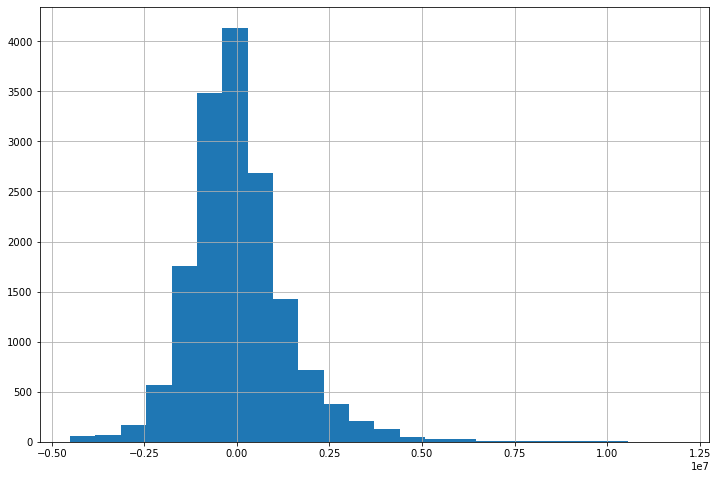

In [28]:
res_smp_tuned['err'] = res_smp_tuned['SALES'] - res_smp_tuned['prediction']
res_smp_tuned['err'].hist(bins = 24, figsize = (12,8))

In [29]:
res_smp_tuned['err'].describe()

count    1.591200e+04
mean     4.825544e+04
std      1.374351e+06
min     -4.505745e+06
25%     -7.643045e+05
50%     -1.051114e+05
75%      6.709895e+05
max      1.193713e+07
Name: err, dtype: float64

## Анализ прогнозов и интерепретация

In [30]:
df_agg = df[['REST_ID', 'SALES', 'frmt_manual_1']].groupby(['REST_ID', 'frmt_manual_1'], as_index = False).agg(['mean', 'std'])
df_agg.columns = ['mean', 'std']
df_agg.reset_index(inplace = True)
df_agg = df_agg.sort_values('mean', ascending = False)
df_agg['cumshare'] = df_agg['mean'].cumsum() / df_agg['mean'].sum()
df_agg['abc'] = df_agg['cumshare'].apply(lambda x: 'A' if x <= 0.8 else 'B' if x <= 0.95 else 'C')
df_agg['cvar'] = df_agg['mean'] / df_agg['std']
df_agg['xyz'] = df_agg['cvar'].apply(lambda x: 'X' if x <= 2 else 'Y' if x <= 5 else 'Z')
df_agg

,REST_ID,frmt_manual_1,mean,std,cumshare,abc,cvar,xyz
4,5,IL,1.768078e+07,5.136557e+06,0.004898,A,3.442145,Y
268,269,IL,1.766558e+07,5.147243e+06,0.009792,A,3.432046,Y
0,1,IL,1.479259e+07,3.927348e+06,0.013891,A,3.766560,Y
264,265,IL,1.478221e+07,3.942531e+06,0.017986,A,3.749422,Y
90,91,IL,1.468616e+07,1.737793e+06,0.022055,A,8.451042,Z
...,...,...,...,...,...,...,...,...
415,416,IL,2.795744e+06,6.228618e+05,0.997072,C,4.488547,Y
513,514,IL/DT,2.723167e+06,3.209765e+05,0.997826,C,8.484008,Z
249,250,IL/DT,2.711123e+06,3.312187e+05,0.998578,C,8.185295,Z
445,446,IL,2.572313e+06,1.832219e+05,0.999290,C,14.039334,Z


In [31]:
result = res_smp_tuned.merge(df_agg[['REST_ID', 'abc', 'xyz']], on = 'REST_ID')
result['abs_err'] = abs(result['err'])
result['perc_err'] = abs(result['err']) / result['SALES']
result['rse'] = (result['err']**2)
result

,REST_ID,Количество квартир в радиусе 500 м,Количество квартир в радиусе 1000 м,Количество квартир в 5 минутах пешком,Количество квартир в 10 минутах пешком,Количество квартир в 5 минутах на машине,Количество жителей в радиусе 500 м,Количество жителей в радиусе 1000 м,Количество жителей в 5 минутах пешком,Количество жителей в 10 минутах пешком,...,weekend_morn_sh,weekend_evn_sh,SALES,prediction,err,abc,xyz,abs_err,perc_err,rse
0,7,4359.0,15805.0,294.0,4145.0,33174.0,10007.0,38385.0,727.0,9909.0,...,0.714286,0.571429,7.101701e+06,8.594714e+06,-1.493013e+06,A,Z,1.493013e+06,0.210233,2.229089e+12
1,7,4359.0,15805.0,294.0,4145.0,33174.0,10007.0,38385.0,727.0,9909.0,...,0.714286,0.571429,6.865733e+06,8.747657e+06,-1.881924e+06,A,Z,1.881924e+06,0.274104,3.541638e+12
2,7,4359.0,15805.0,294.0,4145.0,33174.0,10007.0,38385.0,727.0,9909.0,...,0.714286,0.571429,5.330977e+06,7.553245e+06,-2.222268e+06,A,Z,2.222268e+06,0.416859,4.938475e+12
3,7,4359.0,15805.0,294.0,4145.0,33174.0,10007.0,38385.0,727.0,9909.0,...,0.714286,0.571429,6.721296e+06,8.767953e+06,-2.046657e+06,A,Z,2.046657e+06,0.304503,4.188806e+12
4,7,4359.0,15805.0,294.0,4145.0,33174.0,10007.0,38385.0,727.0,9909.0,...,0.714286,0.571429,7.293749e+06,8.810756e+06,-1.517007e+06,A,Z,1.517007e+06,0.207987,2.301310e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,517,0.0,8562.0,429.0,3211.0,26610.0,7737.0,12008.0,827.0,7677.0,...,0.714286,0.571429,6.818946e+06,4.870224e+06,1.948721e+06,A,Z,1.948721e+06,0.285780,3.797515e+12
15908,517,0.0,8562.0,429.0,3211.0,26610.0,7737.0,12008.0,827.0,7677.0,...,0.714286,0.571429,6.173115e+06,4.966556e+06,1.206559e+06,A,Z,1.206559e+06,0.195454,1.455784e+12
15909,517,0.0,8562.0,429.0,3211.0,26610.0,7737.0,12008.0,827.0,7677.0,...,0.714286,0.571429,6.776809e+06,5.303884e+06,1.472925e+06,A,Z,1.472925e+06,0.217348,2.169507e+12
15910,517,0.0,8562.0,429.0,3211.0,26610.0,7737.0,12008.0,827.0,7677.0,...,0.714286,0.571429,6.558060e+06,4.856612e+06,1.701448e+06,A,Z,1.701448e+06,0.259444,2.894924e+12


In [32]:
result.pivot_table(values = ['abs_err', 'perc_err', 'rse']
                   , columns = 'xyz'
                   , index = ['frmt_manual_1', 'abc']
                   , aggfunc = {'abs_err':'mean'
                               , 'perc_err':'mean'
                               , 'rse': lambda x: math.sqrt(x.mean())}).fillna(0)

abs_err                              perc_err  \
xyz                           X             Y             Z         X   
frmt_manual_1 abc                                                       
DT            A    0.000000e+00  8.294528e+05  8.085215e+05  0.000000   
              B    0.000000e+00  0.000000e+00  5.421012e+05  0.000000   
IL            A    4.034014e+06  1.712835e+06  9.313854e+05  0.658580   
              B    1.520036e+06  1.450499e+06  6.554595e+05  0.517167   
              C    0.000000e+00  1.235182e+06  1.171629e+06  0.000000   
IL/DT         A    1.906774e+06  7.022993e+05  9.531345e+05  0.322608   
              B    0.000000e+00  6.661179e+05  9.246247e+05  0.000000   
              C    0.000000e+00  8.090724e+05  1.005912e+06  0.000000   

                                                rse                \
xyz                       Y         Z             X             Y   
frmt_manual_1 abc                                                   
DT            A    0.101751  0.122312  0.000000e+00  1.198430e+06   
              B    0.000000  0.138467  0.000000e+00  0.000000e+00   
IL            A    0.156125  0.116968  5.244368e+06  2.438093e+06   
              B    0.353356  0.148343  1.620338e+06  1.791847e+06   
              C    0.483562  0.354098  0.000000e+00  1.407412e+06   
IL/DT         A    0.114083  0.127796  2.956236e+06  8.966318e+05   
              B    0.162955  0.213565  0.000000e+00  7.780655e+05   
              C    0.272804  0.315136  0.000000e+00  1.073012e+06   

                                 
xyz                           Z  
frmt_manual_1 abc                
DT            A    9.288958e+05  
              B    7.397308e+05  
IL            A    1.237838e+06  
              B    8.278625e+05  
              C    1.489984e+06  
IL/DT         A    1.307291e+06  
              B    1.155186e+06  
              C    1.156339e+06

In [33]:
result.pivot_table(values = ['abs_err', 'perc_err', 'rse']
                   , columns = 'summer'
                   , index = ['frmt_manual_1']
                   , aggfunc = {'abs_err':'mean'
                               , 'perc_err':'mean'
                               , 'rse': lambda x: math.sqrt(x.mean())}).fillna(0)

abs_err                perc_err                     rse  \
summer                     0             1         0         1             0   
frmt_manual_1                                                                  
DT             659115.685018  7.177876e+05  0.123359  0.119246  9.730950e+05   
IL             906966.554423  1.117793e+06  0.154698  0.164047  1.229187e+06   
IL/DT          840288.720421  1.115621e+06  0.161221  0.181221  1.135773e+06   

                             
summer                    1  
frmt_manual_1                
DT             9.761714e+05  
IL             1.590192e+06  
IL/DT          1.585406e+06

In [34]:
result.pivot_table(values = ['abs_err', 'perc_err', 'rse']
                   , index = ['frmt_manual_1']
                   , aggfunc = {'abs_err':'mean'
                               , 'perc_err':'mean'
                               , 'rse': lambda x: math.sqrt(x.mean())}).fillna(0)

,abs_err,perc_err,rse
frmt_manual_1,,,
DT,683704.346729,0.121636,9.743855e+05
IL,995934.281169,0.158643,1.392987e+06
IL/DT,956064.406708,0.169631,1.343305e+06


In [35]:
result.pivot_table(values = ['abs_err', 'perc_err', 'rse']
                   , index = ['summer']
                   , aggfunc = {'abs_err':'mean'
                               , 'perc_err':'mean'
                               , 'rse': lambda x: math.sqrt(x.mean())}).fillna(0)

,abs_err,perc_err,rse
summer,,,
0,8.899181e+05,0.154674,1.209232e+06
1,1.105443e+06,0.165135,1.574520e+06


In [36]:
result.pivot_table(values = ['abs_err', 'perc_err', 'rse']
                   , index = ['city']
                   , aggfunc = {'abs_err':'mean'
                               , 'perc_err':'mean'
                               , 'rse': lambda x: math.sqrt(x.mean())}).fillna(0)

,abs_err,perc_err,rse
city,,,
0,9.376764e+05,0.167394,1.337525e+06
1,1.066814e+06,0.142516,1.447283e+06


In [37]:
result.pivot_table(values = ['abs_err', 'perc_err', 'rse']
                   , index = ['frmt_manual_1']
                   , columns = 'city'
                   , aggfunc = {'abs_err':'mean'
                               , 'perc_err':'mean'
                               , 'rse': lambda x: math.sqrt(x.mean())}).fillna(0)

abs_err                perc_err                     rse  \
city                      0             1         0         1             0   
frmt_manual_1                                                                 
DT             7.763257e+05  4.431653e+05  0.139764  0.074557  1.090820e+06   
IL             9.286117e+05  1.120135e+06  0.167375  0.142535  1.324807e+06   
IL/DT          1.015682e+06  7.711642e+05  0.173104  0.158858  1.442089e+06   

                             
city                      1  
frmt_manual_1                
DT             5.700380e+05  
IL             1.510715e+06  
IL/DT          9.752449e+05

In [44]:
X = df.drop(columns = ['SALES', 'weekday_morn_sh', 'weekday_evn_sh', 'weekend_morn_sh',
       'weekend_evn_sh', 'hrs_weekday', 'hrs_weekend'])
y = df[['REST_ID', 'SALES']]

model=CatBoostRegressor(cat_features=cat_cols, random_state=1, metric_period=10, **params)

model.fit(X.drop(columns = 'REST_ID'), y.drop(columns = 'REST_ID')
        #, custom_loss='MAE'
        ,verbose=False
       ,plot = True)
y_pred_cb = model.predict(X.drop(columns = 'REST_ID'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [45]:
import shap
shap.initjs()

<AxesSubplot:ylabel='feature_names'>

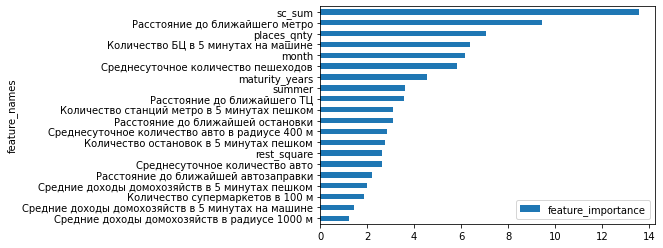

In [46]:

data = pd.DataFrame({'feature_importance': model.get_feature_importance(), 
              'feature_names': X.drop(columns = 'REST_ID').columns}).sort_values(by=['feature_importance'], 
                                                       ascending=False)
data[:20].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')

In [47]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.drop(columns = 'REST_ID'))

In [48]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X.drop(columns = 'REST_ID').iloc[1,:])

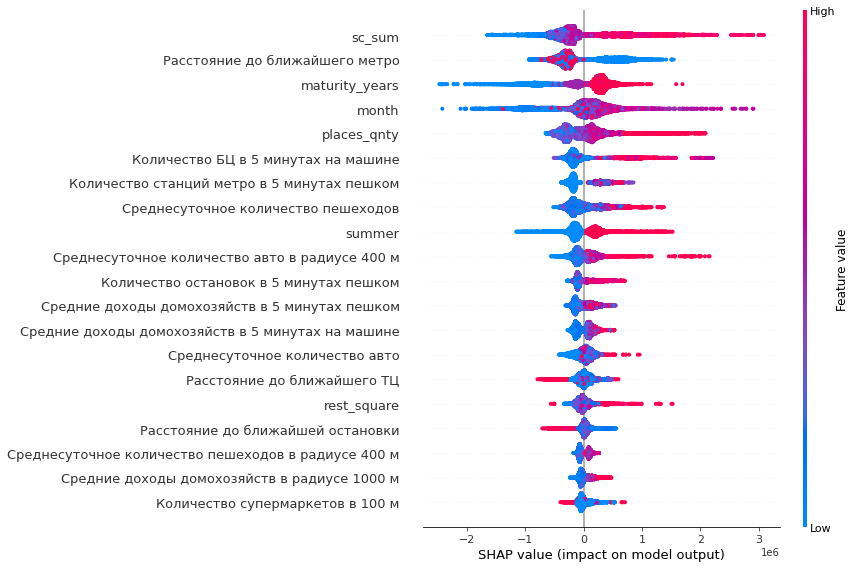

In [49]:
shap.summary_plot(shap_values, X.drop(columns = 'REST_ID'))